In [1]:
!pip3 install nltk
!pip3 install Sastrawi
!pip3 install wordcloud
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('punkt')
nltk.download('stopwords')
pd.set_option('display.max_columns', 50)

[nltk_data] Downloading package punkt to /home/adalberht/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/adalberht/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Key Norm into RAM

In [2]:
PATH_TO_KEY_NORM_FILE = './dictionary/key_norm.csv'

key_norm = pd.read_csv(PATH_TO_KEY_NORM_FILE).drop(['_id'], axis=1)
key_norm.head()

,singkat,hasil
0,abis,habis
1,accent,tekanan
2,accept,terima
3,accident,kecelakaan
4,achievement,prestasi


In [3]:
e

{'abis': 'habis',
 'accent': 'tekanan',
 'accept': 'terima',
 'accident': 'kecelakaan',
 'achievement': 'prestasi',
 'acra': 'acara',
 'acrany': 'acaranya',
 'acrnya': 'acaranya',
 'action': 'aksi',
 'active': 'aktif',
 'activity': 'aktivitas',
 'actually': 'sebenarnya',
 'actualy': 'sebenarnya',
 'ad': 'ada',
 'ade': 'ada',
 'adult': 'dewasa',
 'adventure': 'petualangan',
 'adventurer': 'petualang',
 'advice': 'nasehat',
 'after': 'setelah',
 'afternun': 'sore',
 'again': 'lagi',
 'agency': 'perwakilan',
 'agent': 'agen',
 'agk': 'agak',
 'agktn': 'angkatan',
 'agree': 'setuju',
 'agreement': 'persetujuan',
 'aing': 'saya',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'aje': 'saja',
 'ajeh': 'saja',
 'ajk': 'ajak',
 'ak': 'saya',
 'akeh': 'banyak',
 'akhire': 'akhirnya',
 'aktifkn': 'aktifkan',
 'aku': 'saya',
 'alhamdlh': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'almost': 'hampir',
 'almt': 'alamat',
 'alone': 'sendiri',
 'alsn': 'alasan',
 'also': 'juga',
 'always': '

## Read Data

In [4]:
## Hard coded constants for locating the inputs
PATH_TO_NEW_SENTIMENT_FOLDER = './'
SUFFIX = 'final.csv'
NEGATIVE_DATASET = PATH_TO_NEW_SENTIMENT_FOLDER + 'negative_tweet_' + SUFFIX
POSITIVE_DATASET = PATH_TO_NEW_SENTIMENT_FOLDER + 'positive_tweet_' + SUFFIX

In [5]:
negative_data = pd.read_csv(NEGATIVE_DATASET)
positive_data = pd.read_csv(POSITIVE_DATASET)

In [6]:
negative_data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'location',
       'hashtags', 'link', 'retweet', 'quote_url', 'video',
       'profile_image_url', 'gif_thumb', 'gif_url', 'has_parent_tweet',
       'is_quote_status', 'is_reply_to', 'quote_id', 'replies', 'tags',
       'video_thumb', 'video_url'],
      dtype='object')

In [7]:
positive_data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'location',
       'hashtags', 'link', 'retweet', 'quote_url', 'video',
       'profile_image_url', 'gif_thumb', 'gif_url', 'has_parent_tweet',
       'is_quote_status', 'is_reply_to', 'quote_id', 'replies', 'tags',
       'video_thumb', 'video_url'],
      dtype='object')

In [8]:
negative_data['is_depressed'] = True
print(negative_data.count())
negative_data.head()

id                   358
conversation_id      358
created_at           358
date                 358
time                 358
timezone             358
user_id              358
username             358
name                 358
place                  0
tweet                358
mentions             125
urls                 358
photos               358
replies_count        358
retweets_count       358
likes_count          358
location               0
hashtags             358
link                 358
retweet                0
quote_url              2
video                301
profile_image_url    301
gif_thumb              0
gif_url                0
has_parent_tweet      57
is_quote_status       57
is_reply_to           57
quote_id              57
replies               57
tags                  57
video_thumb            0
video_url              0
is_depressed         358
dtype: int64


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video,profile_image_url,gif_thumb,gif_url,has_parent_tweet,is_quote_status,is_reply_to,quote_id,replies,tags,video_thumb,video_url,is_depressed
0,344753370717880320,344753370717880320,1371030583000,2013-06-12,16:49:43,WIB,568842350,snsdseororohyun,서주현 IS BACK!,NaN,[] lagi galau + patah hati + kecewa + sedih = ...,NaN,[],[],0,0,0,NaN,[],https://twitter.com/SNSDSeororohyun/status/344...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/891673537...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,352666527796965377,352666527796965377,1372917227000,2013-07-04,12:53:47,WIB,1374001812,hening_d,Hening Dalu R,NaN,Laperr .-. Galau -_- sedih.-. Pengen mati :3,NaN,[],[],0,0,0,NaN,[],https://twitter.com/hening_d/status/3526665277...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/949643587...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,355012744627499008,355002334486593538,1373476608000,2013-07-11,00:16:48,WIB,109124388,reinaldohamon,Reinaldo,NaN,"@Tegardd sedih,galau,nangis,bete,gebuk2 tembok...",['tegardd'],[],[],0,0,0,NaN,[],https://twitter.com/reinaldohamon/status/35501...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/437443485...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,355567387229159425,355567387229159425,1373608845000,2013-07-12,13:00:45,WIB,332198515,hismapralians,Hisma,NaN,"Galau, paling jatoh juga. Nangis, sedih, curha...",NaN,[],[],0,0,0,NaN,[],https://twitter.com/Hismapralians/status/35556...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/103631760...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,364744860743376897,364744860743376897,1375796926000,2013-08-06,20:48:46,WIB,1540245056,muhalfiandi,Muhammad Alfiandi,NaN,Galau?tidak|sedih?tidak?|senang?tidak|punya pa...,NaN,[],[],0,0,0,NaN,[],https://twitter.com/MuhAlfiandi/status/3647448...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/460405546...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [9]:
positive_data['is_depressed'] = False
print(positive_data.count())
positive_data.head()

id                   597
conversation_id      597
created_at           597
date                 597
time                 597
timezone             597
user_id              597
username             597
name                 597
place                  0
tweet                597
mentions             318
urls                 597
photos               597
replies_count        597
retweets_count       597
likes_count          597
location               0
hashtags             597
link                 597
retweet                0
quote_url             19
video                428
profile_image_url    428
gif_thumb              0
gif_url                0
has_parent_tweet     169
is_quote_status      169
is_reply_to          169
quote_id             169
replies              169
tags                 169
video_thumb            0
video_url              0
is_depressed         597
dtype: int64


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video,profile_image_url,gif_thumb,gif_url,has_parent_tweet,is_quote_status,is_reply_to,quote_id,replies,tags,video_thumb,video_url,is_depressed
0,397730606202617857,397730606202617857,1383661340000,2013-11-05,21:22:20,WIB,1148359183,ewithamasria,Ewitha Siregar,NaN,Hufff RT @Kepotology: Sedih aja kenapa harus m...,NaN,[],[],0,0,0,NaN,[],https://twitter.com/EwithaMasria/status/397730...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/632616533...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,424554780669640706,424554780669640706,1390056722000,2014-01-18,21:52:02,WIB,251052931,yhe_fahranie,Yustiana Fahrani .S,NaN,Hahaha emang kalo kalian benci aku terus aku g...,NaN,[],[],0,0,0,NaN,[],https://twitter.com/yhe_fahranie/status/424554...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/537166453...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,464759654438801408,464627275439566849,1399642311000,2014-05-09,20:31:51,SE Asia Standard Time,77668466,viegyuzizi,via 소피아,NaN,@tamochii ah sialan -_- lu diajak ngomong seri...,NaN,[],[],0,0,0,NaN,[],https://twitter.com/viegyuzizi/status/46475965...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/857586432...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,487431696330264576,487431696330264576,1405047747000,2014-07-11,10:02:27,SE Asia Standard Time,329514908,erlina_safitri1,Erlina s,NaN,Itu Rambutnya asli apa gk ya?OMG badayyyy bigi...,NaN,['http://ask.fm/a/b0l03ok8'],[],0,0,0,NaN,[],https://twitter.com/erlina_safitri1/status/487...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/914332343...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,489888664575832064,489888664575832064,1405633533000,2014-07-18,04:45:33,SE Asia Standard Time,70299501,ulfatis,Ulfatisyarifah,NaN,@rianyynt dih le ultah? serius lu? Asli ultah ...,['rianyynt'],[],[],0,0,0,NaN,[],https://twitter.com/ulfaTis/status/48988866457...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/928503046...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [10]:
data = pd.DataFrame(positive_data,)
data = data.append(negative_data)
print(data.count())
data.head()

id                   955
conversation_id      955
created_at           955
date                 955
time                 955
timezone             955
user_id              955
username             955
name                 955
place                  0
tweet                955
mentions             443
urls                 955
photos               955
replies_count        955
retweets_count       955
likes_count          955
location               0
hashtags             955
link                 955
retweet                0
quote_url             21
video                729
profile_image_url    729
gif_thumb              0
gif_url                0
has_parent_tweet     226
is_quote_status      226
is_reply_to          226
quote_id             226
replies              226
tags                 226
video_thumb            0
video_url              0
is_depressed         955
dtype: int64


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video,profile_image_url,gif_thumb,gif_url,has_parent_tweet,is_quote_status,is_reply_to,quote_id,replies,tags,video_thumb,video_url,is_depressed
0,397730606202617857,397730606202617857,1383661340000,2013-11-05,21:22:20,WIB,1148359183,ewithamasria,Ewitha Siregar,NaN,Hufff RT @Kepotology: Sedih aja kenapa harus m...,NaN,[],[],0,0,0,NaN,[],https://twitter.com/EwithaMasria/status/397730...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/632616533...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,424554780669640706,424554780669640706,1390056722000,2014-01-18,21:52:02,WIB,251052931,yhe_fahranie,Yustiana Fahrani .S,NaN,Hahaha emang kalo kalian benci aku terus aku g...,NaN,[],[],0,0,0,NaN,[],https://twitter.com/yhe_fahranie/status/424554...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/537166453...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,464759654438801408,464627275439566849,1399642311000,2014-05-09,20:31:51,SE Asia Standard Time,77668466,viegyuzizi,via 소피아,NaN,@tamochii ah sialan -_- lu diajak ngomong seri...,NaN,[],[],0,0,0,NaN,[],https://twitter.com/viegyuzizi/status/46475965...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/857586432...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,487431696330264576,487431696330264576,1405047747000,2014-07-11,10:02:27,SE Asia Standard Time,329514908,erlina_safitri1,Erlina s,NaN,Itu Rambutnya asli apa gk ya?OMG badayyyy bigi...,NaN,['http://ask.fm/a/b0l03ok8'],[],0,0,0,NaN,[],https://twitter.com/erlina_safitri1/status/487...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/914332343...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,489888664575832064,489888664575832064,1405633533000,2014-07-18,04:45:33,SE Asia Standard Time,70299501,ulfatis,Ulfatisyarifah,NaN,@rianyynt dih le ultah? serius lu? Asli ultah ...,['rianyynt'],[],[],0,0,0,NaN,[],https://twitter.com/ulfaTis/status/48988866457...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/928503046...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


## Preprocessing Data

In [11]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

import re

stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh']
 
# Tambahkan Stopword Baru
stop_words = stop_factory.get_stop_words()+more_stopword

# Create StopWord Removal using our own Stop words
stop_word_remover = StopWordRemover(ArrayDictionary(stop_words))

# Create stemmer
stemmer = StemmerFactory().create_stemmer()

def formalize(word):
    if word in key_norm_dict:
        return key_norm_dict[word]
    return word

def preprocess_tweet(tweet, debug = False):
    if debug: print(tweet, end="\n\n")
    
    # Lower casing
    clean_tweet = tweet.lower() #lowercase
    
    # URL Removal and Username removal
    clean_tweet = re.sub(r"(?:\@|https?\://)\S+", " ", clean_tweet)
    if debug: print('After URL and username removal: ', clean_tweet, end="\n\n")
    
    # Punctuation removal
    clean_tweet = re.sub(r'[^\w\s]',' ',clean_tweet)
    if debug: print('After punctuation removal: ', clean_tweet, end="\n\n")
    
    # Extra space removal
    clean_tweet = re.sub('\s+', ' ', clean_tweet)
    if debug: print('After extra space removal: ', clean_tweet, end="\n\n")
    
     # Trimming
    clean_tweet = clean_tweet.strip()
    if debug: print('After trimming: ', clean_tweet)
         
    # Transforming informal words to formal words
    clean_tweet = " ".join([formalize(word) for word in word_tokenize(clean_tweet)])
    if debug: print('After transofrming informal words: ', clean_tweet, end="\n\n")
     
    # Stop words removal
    clean_tweet = stop_word_remover.remove(clean_tweet)
    if debug: print('After stop words removal: ', clean_tweet, end="\n\n")
    
    # Stemming
    clean_tweet = stemmer.stem(clean_tweet)
    if debug: print('After stemming: ', clean_tweet, end="\n\n")
    
    if debug: print()
    
    return clean_tweet

In [12]:
cleaned = []
for idx, tweet in enumerate(data['tweet']):
    print('{}/{}'.format(idx, len(data['tweet'])))
    cleaned.append(preprocess_tweet(tweet, True))
    print()
    
cleaned

0/955
Hufff RT @Kepotology: Sedih aja kenapa harus mati lampu sekarang, padahal aku lagi pengen galau yg terang2an. Bukan gelap2an gini

After URL and username removal:  hufff rt   sedih aja kenapa harus mati lampu sekarang, padahal aku lagi pengen galau yg terang2an. bukan gelap2an gini

After punctuation removal:  hufff rt   sedih aja kenapa harus mati lampu sekarang  padahal aku lagi pengen galau yg terang2an  bukan gelap2an gini

After extra space removal:  hufff rt sedih aja kenapa harus mati lampu sekarang padahal aku lagi pengen galau yg terang2an bukan gelap2an gini

After trimming:  hufff rt sedih aja kenapa harus mati lampu sekarang padahal aku lagi pengen galau yg terang2an bukan gelap2an gini
After transofrming informal words:  hufff rt sedih saja kenapa harus mati lampu sekarang padahal saya lagi ingin galau yang terang2an bukan gelap2an begini

After stop words removal:  hufff rt sedih kenapa mati lampu sekarang padahal lagi galau terang2an bukan gelap2an begini

After st

After stemming:  haha emang iya dek biasa mah stres p yaallah gondok banget ka kalau mah berisik beranta



9/955
Stres , pusing , gondok yang kena sasaran gw :D udh biasa kok :* jd udh kebal deh

After URL and username removal:  stres , pusing , gondok yang kena sasaran gw :d udh biasa kok :* jd udh kebal deh

After punctuation removal:  stres   pusing   gondok yang kena sasaran gw  d udh biasa kok    jd udh kebal deh

After extra space removal:  stres pusing gondok yang kena sasaran gw d udh biasa kok jd udh kebal deh

After trimming:  stres pusing gondok yang kena sasaran gw d udh biasa kok jd udh kebal deh
After transofrming informal words:  stres pusing gondok yang kena sasaran saya d sudah biasa kok jadi sudah kebal deh

After stop words removal:  stres pusing gondok kena sasaran d biasa kok jadi kebal deh

After stemming:  stres pusing gondok kena sasar d biasa kok jadi kebal deh



10/955
"2 hari bersama lu yg udh bener" ngejagain terus jdi di bikin kesel,gondok,tegang,stres,gi

After stemming:  yess akhir doa makbul hahaha betul betul malam tahun baru ea berita gembira yihaaaa



18/955
HAHAHA jay yaampun ga biasa manggil jay:( semua org lg gila ikon jg nih yess aku senang akhirnya😩

After URL and username removal:  hahaha jay yaampun ga biasa manggil jay:( semua org lg gila ikon jg nih yess aku senang akhirnya😩

After punctuation removal:  hahaha jay yaampun ga biasa manggil jay   semua org lg gila ikon jg nih yess aku senang akhirnya 

After extra space removal:  hahaha jay yaampun ga biasa manggil jay semua org lg gila ikon jg nih yess aku senang akhirnya 

After trimming:  hahaha jay yaampun ga biasa manggil jay semua org lg gila ikon jg nih yess aku senang akhirnya
After transofrming informal words:  hahaha jay yaampun tidak biasa manggil jay semua orang lagi gila ikon juga nih yess saya senang akhirnya

After stop words removal:  hahaha jay yaampun biasa manggil jay semua orang gila ikon nih yess senang akhirnya

After stemming:  hahaha jay yaampun bias

After stemming:  luar biasa layan pa suka kata perintah singkat padat jelas asal sumber benar haleluya tuhan yesus kati



26/955
Wardah ngeluarin BB cushion OMG YESS!!!!! gak sabar nunggu launching..udah cukmey bgt sama produk2 Wardah..pake BB cushion Laneige hasil akhirnya oke sih,maulah mirip2 (jauh) sama Suzy (apeulah hahaha) tp mehong plus bikin jerawatan..bangga bgt produk lokal makin berjaya 👏🏼👏🏼

After URL and username removal:  wardah ngeluarin bb cushion omg yess!!!!! gak sabar nunggu launching..udah cukmey bgt sama produk2 wardah..pake bb cushion laneige hasil akhirnya oke sih,maulah mirip2 (jauh) sama suzy (apeulah hahaha) tp mehong plus bikin jerawatan..bangga bgt produk lokal makin berjaya 👏🏼👏🏼

After punctuation removal:  wardah ngeluarin bb cushion omg yess      gak sabar nunggu launching  udah cukmey bgt sama produk2 wardah  pake bb cushion laneige hasil akhirnya oke sih maulah mirip2  jauh  sama suzy  apeulah hahaha  tp mehong plus bikin jerawatan  bangga bgt produk l

After stemming:  haleluya slalom bapak ibu saudara sahabat teman2 semua mana ada syukur tuhan atas kasih anugerah nya sangat luar biasa hidup mana telah temu



33/955
Indonesia itu indah krn perbedaan, perbedaanlah yg mmbuat kita kuat asalkan kita bsmemposisikan diri kita dlm sgl hal & bisa saling melengkapi. Moment luar biasa tjd difinal cbng karate putra saat itu Atlet Rifki A. Sujud syukur & pelatihnya teriak "Halleluya" karena mndptkn emas

After URL and username removal:  indonesia itu indah krn perbedaan, perbedaanlah yg mmbuat kita kuat asalkan kita bsmemposisikan diri kita dlm sgl hal & bisa saling melengkapi. moment luar biasa tjd difinal cbng karate putra saat itu atlet rifki a. sujud syukur & pelatihnya teriak "halleluya" karena mndptkn emas

After punctuation removal:  indonesia itu indah krn perbedaan  perbedaanlah yg mmbuat kita kuat asalkan kita bsmemposisikan diri kita dlm sgl hal   bisa saling melengkapi  moment luar biasa tjd difinal cbng karate putra saat itu atlet 

After stemming:  haleluya tuhan kati kalian semua2 saudra2ku luar biasa



39/955
HadiratMu luar biasa,, Roh KudusMu penuhiku Haleluya.  Happy Sunday all, Tuhan Yesus memberkati

After URL and username removal:  hadiratmu luar biasa,, roh kudusmu penuhiku haleluya.  happy sunday all, tuhan yesus memberkati

After punctuation removal:  hadiratmu luar biasa   roh kudusmu penuhiku haleluya   happy sunday all  tuhan yesus memberkati

After extra space removal:  hadiratmu luar biasa roh kudusmu penuhiku haleluya happy sunday all tuhan yesus memberkati

After trimming:  hadiratmu luar biasa roh kudusmu penuhiku haleluya happy sunday all tuhan yesus memberkati
After transofrming informal words:  hadiratmu luar biasa roh kudusmu penuhiku haleluya senang sunday all tuhan yesus memberkati

After stop words removal:  hadiratmu luar biasa roh kudusmu penuhiku haleluya senang sunday all tuhan yesus memberkati

After stemming:  hadirat luar biasa roh kudus penuh haleluya senang sunday all tuhan yesu

After stemming:  yess akhir orang notice hahaha terimakasih doh



47/955
Halleluya, Puji Tuhan...  Panti Asuhan Silo Karanganyar meraih juara ke-2 dalam acara Parade Pujian Menyambut Natal 2018 di Palur Plasa Karanganyar. Hasil ini sangat luar biasa, sebab belum pernah sekali pun...  https://www.facebook.com/100000331922142/posts/2124063304281380/ …

After URL and username removal:  halleluya, puji tuhan...  panti asuhan silo karanganyar meraih juara ke-2 dalam acara parade pujian menyambut natal 2018 di palur plasa karanganyar. hasil ini sangat luar biasa, sebab belum pernah sekali pun...    …

After punctuation removal:  halleluya  puji tuhan     panti asuhan silo karanganyar meraih juara ke 2 dalam acara parade pujian menyambut natal 2018 di palur plasa karanganyar  hasil ini sangat luar biasa  sebab belum pernah sekali pun        

After extra space removal:  halleluya puji tuhan panti asuhan silo karanganyar meraih juara ke 2 dalam acara parade pujian menyambut natal 2018 di palu

After stemming:  saudara sadar tekun asih allah kita lihat kasih mulia tuhan luar biasa hidup kita haleluya amin yosua 23 8 16



58/955
Empat tahun lalu, pas Imlek... Dan saat ini, pas Cap Go Meh... Luar biasa pemeliharaan Tuhan dalam mempersatukan kami, bersyukur untuk segala penyertaanNya, pertolonganNya, dan limpahan berkatNya. Haleluya. Amin.  pic.twitter.com/upUfALdf2X

After URL and username removal:  empat tahun lalu, pas imlek... dan saat ini, pas cap go meh... luar biasa pemeliharaan tuhan dalam mempersatukan kami, bersyukur untuk segala penyertaannya, pertolongannya, dan limpahan berkatnya. haleluya. amin.  pic.twitter.com/upufaldf2x

After punctuation removal:  empat tahun lalu  pas imlek    dan saat ini  pas cap go meh    luar biasa pemeliharaan tuhan dalam mempersatukan kami  bersyukur untuk segala penyertaannya  pertolongannya  dan limpahan berkatnya  haleluya  amin   pic twitter com upufaldf2x

After extra space removal:  empat tahun lalu pas imlek dan saat ini pas cap 

After stemming:  pleaseee read it akan sesal walaupun banjir air mata kalau baca kok teriak dm wkwk campur aduk banget deh baca fic senang hkyun layar sedih konflik sangat complicated kasihan sama hawe hadehhh



65/955
Beneran nyesel baru nonton o-negative series sih. Ceritanya bikin campur aduk, apalagi bagi mahasiswa yang udah ngalamin masa-masa perpeloncoan kayak ep awalnya. Beneran jadi kilas balik, ternyata dulu aku sama temen-temen kelakuannya gitu hahaha

After URL and username removal:  beneran nyesel baru nonton o-negative series sih. ceritanya bikin campur aduk, apalagi bagi mahasiswa yang udah ngalamin masa-masa perpeloncoan kayak ep awalnya. beneran jadi kilas balik, ternyata dulu aku sama temen-temen kelakuannya gitu hahaha

After punctuation removal:  beneran nyesel baru nonton o negative series sih  ceritanya bikin campur aduk  apalagi bagi mahasiswa yang udah ngalamin masa masa perpeloncoan kayak ep awalnya  beneran jadi kilas balik  ternyata dulu aku sama temen temen 

After stemming:  ngeyakinin diri buat golput golput ingin ikut berpatisipisi harap pilpres moga jago kalah bundir itung2 buat kurang populasi bumi



72/955
Ayok semangat! Semua org pasti juga merasa pengen bundir, tapi jgn pake cara itu yaaa, semua org sayang kok sm kamu🥰❤️

After URL and username removal:  ayok semangat! semua org pasti juga merasa pengen bundir, tapi jgn pake cara itu yaaa, semua org sayang kok sm kamu🥰❤️

After punctuation removal:  ayok semangat  semua org pasti juga merasa pengen bundir  tapi jgn pake cara itu yaaa  semua org sayang kok sm kamu   

After extra space removal:  ayok semangat semua org pasti juga merasa pengen bundir tapi jgn pake cara itu yaaa semua org sayang kok sm kamu 

After trimming:  ayok semangat semua org pasti juga merasa pengen bundir tapi jgn pake cara itu yaaa semua org sayang kok sm kamu
After transofrming informal words:  ayok semangat semua orang pasti juga merasa ingin bundir tapi jangan pakai cara itu yaaa semua orang sayang kok s

After stemming:  tertawa sama sedih nos ngakaknya lucu lihat bangsawan tuduh tuduh sedih soal baru nebak nya mati wkwkwk parah acara nya bikin lapar ingin poop tapi cuma sebentar astagaaaa



77/955
Akuuu jugaaaa dapet yg begituaaan..dateng ke site aku, pake baju sobek2, nyeker alias barefoot, foto muke sedih ama hiu mati 🤔🦈. Trus pasang di social media seeeolaaaah dianyaa pahlawaan. Uda pengen aku lempar pake hiu mati yg gedenya 2 meter.

After URL and username removal:  akuuu jugaaaa dapet yg begituaaan..dateng ke site aku, pake baju sobek2, nyeker alias barefoot, foto muke sedih ama hiu mati 🤔🦈. trus pasang di social media seeeolaaaah dianyaa pahlawaan. uda pengen aku lempar pake hiu mati yg gedenya 2 meter.

After punctuation removal:  akuuu jugaaaa dapet yg begituaaan  dateng ke site aku  pake baju sobek2  nyeker alias barefoot  foto muke sedih ama hiu mati     trus pasang di social media seeeolaaaah dianyaa pahlawaan  uda pengen aku lempar pake hiu mati yg gedenya 2 meter 

After

After stemming:  her mau bundir mati capek sama hidup tetiba hampir serempet her yaampun kaget hampir aduh bentar bentar panik gemeteran



82/955
Aamiin ya mujibassailin insyaAllah...  Pagi kembali mbak... Alhamdulillah memang itu yang terbaik, karena tidak ada gunanya menangisi yang tidak pasti dan hanya sia sia  Selamat beraktifitas mbak sayang salam semangat semoga semuanya dilancarkan 😊😘😘

After URL and username removal:  aamiin ya mujibassailin insyaallah...  pagi kembali mbak... alhamdulillah memang itu yang terbaik, karena tidak ada gunanya menangisi yang tidak pasti dan hanya sia sia  selamat beraktifitas mbak sayang salam semangat semoga semuanya dilancarkan 😊😘😘

After punctuation removal:  aamiin ya mujibassailin insyaallah     pagi kembali mbak    alhamdulillah memang itu yang terbaik  karena tidak ada gunanya menangisi yang tidak pasti dan hanya sia sia  selamat beraktifitas mbak sayang salam semangat semoga semuanya dilancarkan    

After extra space removal:  aamiin ya m

After stemming:  beda pilih biasa kalau sama semua jadi asik kann sooo jangan padu ya cuma beda pilih untuk siapa jadi nanti percaya arti insyaallah baik buat indonesia selamat pesta demokrasi semua pemilu2019



88/955
 http://hukum.blog/i/40/demokrasi-naskah-akademik-ruu-pemilu … berbeda pilihan itu biasa. karna kalo sama semua jadi gaasik, ya kann? sooo, jangan padu lagi ya cuma karna berbeda pilihan. dan untuk siapapun yg jadi nantinya, percaya aja berarti dia insyaAllah yang terbaik buat Indonesia. Selamat berpesta demokrasi, …

After URL and username removal:     … berbeda pilihan itu biasa. karna kalo sama semua jadi gaasik, ya kann? sooo, jangan padu lagi ya cuma karna berbeda pilihan. dan untuk siapapun yg jadi nantinya, percaya aja berarti dia insyaallah yang terbaik buat indonesia. selamat berpesta demokrasi, …

After punctuation removal:       berbeda pilihan itu biasa  karna kalo sama semua jadi gaasik  ya kann  sooo  jangan padu lagi ya cuma karna berbeda pilihan  dan unt

After stemming:  morron bunuh diri sih risih lihat mati sedih kegoblokanya



96/955
Kamu tu punya setrum apa si ko? It's been 5yrs lho, udah ga pernah ketemu lagi, apalagi liat kamu main piano langsung. Tapi, ga sengaja liat videomu, degdegannya masih sama, rasanya masih sama, bahkan nambah..  Iya, nambah. Nambah emosi negatif. Sedih, nyesel, marah. Campur aduk.

After URL and username removal:  kamu tu punya setrum apa si ko? it's been 5yrs lho, udah ga pernah ketemu lagi, apalagi liat kamu main piano langsung. tapi, ga sengaja liat videomu, degdegannya masih sama, rasanya masih sama, bahkan nambah..  iya, nambah. nambah emosi negatif. sedih, nyesel, marah. campur aduk.

After punctuation removal:  kamu tu punya setrum apa si ko  it s been 5yrs lho  udah ga pernah ketemu lagi  apalagi liat kamu main piano langsung  tapi  ga sengaja liat videomu  degdegannya masih sama  rasanya masih sama  bahkan nambah    iya  nambah  nambah emosi negatif  sedih  nyesel  marah  campur aduk 

After ex

After stemming:  habis baca tweet orang ttg rokok bahas soal rokok saya tbtb rasa sedih banget pas tau sudah jadi okok aktif dia dulu mati mati loh tolak rokok bela bain beli vape harga juta ingin ngebul tida udut terus pas kemarin main



102/955
Sedih denger berita di tv ada KPPS skitar 103 orng yg meninggal akibat kelalahan.  Gw dlam hati pengen gitu dnger kabar NETIZEN MATI AKIBAT KELELAHAN NGEEBACOOT tntng pilpres.  Kalo udah nyoblos yaa udaah. Kmu kira bacotmu di sosmed bisa ngubah nasib negara ? Goooblwuok.

After URL and username removal:  sedih denger berita di tv ada kpps skitar 103 orng yg meninggal akibat kelalahan.  gw dlam hati pengen gitu dnger kabar netizen mati akibat kelelahan ngeebacoot tntng pilpres.  kalo udah nyoblos yaa udaah. kmu kira bacotmu di sosmed bisa ngubah nasib negara ? goooblwuok.

After punctuation removal:  sedih denger berita di tv ada kpps skitar 103 orng yg meninggal akibat kelalahan   gw dlam hati pengen gitu dnger kabar netizen mati akibat kelel

After stemming:  semangat kalau down lakuin yang dilakuin bundir selfharm strong girl



108/955
Iron man juga idolaku mbaaaak. Sedih banget pas mati 😫. Rasane pengen melu layat. Pahlawan sejati

After URL and username removal:  iron man juga idolaku mbaaaak. sedih banget pas mati 😫. rasane pengen melu layat. pahlawan sejati

After punctuation removal:  iron man juga idolaku mbaaaak  sedih banget pas mati    rasane pengen melu layat  pahlawan sejati

After extra space removal:  iron man juga idolaku mbaaaak sedih banget pas mati rasane pengen melu layat pahlawan sejati

After trimming:  iron man juga idolaku mbaaaak sedih banget pas mati rasane pengen melu layat pahlawan sejati
After transofrming informal words:  iron man juga idolaku mbaaaak sedih banget pas mati rasane ingin ikut layat pahlawan sejati

After stop words removal:  iron man idolaku mbaaaak sedih banget pas mati rasane ikut layat pahlawan sejati

After stemming:  iron man idola mbaaaak sedih banget pas mati rasane ikut l

After stemming:  iya deh pula basic nya gil emang eropa kan i mean ph emang ambil latar eropa wkwk asa eps 1 cuma bundir



115/955
Assalammualaikum .... Selamat pagi semoga saya selamat pergi ke Serdang Selangor esk dan selamat pulang ke Melaka dengan selamat kawan-kawan dan keluarga doakan yg terbaik ye insyaallah amin.😉😊

After URL and username removal:  assalammualaikum .... selamat pagi semoga saya selamat pergi ke serdang selangor esk dan selamat pulang ke melaka dengan selamat kawan-kawan dan keluarga doakan yg terbaik ye insyaallah amin.😉😊

After punctuation removal:  assalammualaikum      selamat pagi semoga saya selamat pergi ke serdang selangor esk dan selamat pulang ke melaka dengan selamat kawan kawan dan keluarga doakan yg terbaik ye insyaallah amin   

After extra space removal:  assalammualaikum selamat pagi semoga saya selamat pergi ke serdang selangor esk dan selamat pulang ke melaka dengan selamat kawan kawan dan keluarga doakan yg terbaik ye insyaallah amin 

After 

After stemming:  ini ada bosen2nya yaaa mom tidak sabar lihat beneran bundir



122/955
Pecah sih, dr awal sampe akhir film rasanya emosi campur aduk, ga nyesel sama sekali harus jauh2 ke kota tetangga bela2in nonton ini😍 #AvengersEndGame pic.twitter.com/l66MhaM2tk

After URL and username removal:  pecah sih, dr awal sampe akhir film rasanya emosi campur aduk, ga nyesel sama sekali harus jauh2 ke kota tetangga bela2in nonton ini😍 #avengersendgame pic.twitter.com/l66mham2tk

After punctuation removal:  pecah sih  dr awal sampe akhir film rasanya emosi campur aduk  ga nyesel sama sekali harus jauh2 ke kota tetangga bela2in nonton ini   avengersendgame pic twitter com l66mham2tk

After extra space removal:  pecah sih dr awal sampe akhir film rasanya emosi campur aduk ga nyesel sama sekali harus jauh2 ke kota tetangga bela2in nonton ini avengersendgame pic twitter com l66mham2tk

After trimming:  pecah sih dr awal sampe akhir film rasanya emosi campur aduk ga nyesel sama sekali harus jauh2

After stemming:  kesel tingkat dewa zeus ketika nonton bioskop pas jalan lobby studio ketemu orang baru kelar nonton eh sedih iron man nya mati walah gustiiiii tidak suek suek tiket



129/955
Aku tadinya mati matian gak mau mereka pisah pokoknya tetep harus sama sama terus. Tapi kalau dipikir lagi itu egois banget. Mereka tetep berusaha biar fans gak sedih tapi disatu sisi aku tau mereka pengen coba jalan baru. Apapun itu, I will always support you my girls! ❤

After URL and username removal:  aku tadinya mati matian gak mau mereka pisah pokoknya tetep harus sama sama terus. tapi kalau dipikir lagi itu egois banget. mereka tetep berusaha biar fans gak sedih tapi disatu sisi aku tau mereka pengen coba jalan baru. apapun itu, i will always support you my girls! ❤

After punctuation removal:  aku tadinya mati matian gak mau mereka pisah pokoknya tetep harus sama sama terus  tapi kalau dipikir lagi itu egois banget  mereka tetep berusaha biar fans gak sedih tapi disatu sisi aku tau mereka

After stemming:  ustazah ucap selamat hari guru semua didik ira agama bangsa etnik terima kasih rana susah payah didik anak bangsa jadi insan baik dunia akhirat insyaallah psst ustzh acara pecah telur terima kasih anjur pic twitter com wdpr9a5xks



134/955
kaget dulu dong kok ini orang pengen banget bundir udh ga waras ato gimana, trus tanya lah knp kok harus bundir ga jelas kek gitu. ya paling ntar bakal ngasih masukan2 gitu deh sukur2 dia mau dengerin dan gajadi bundir tp kalo ga yaa *semoga di akhirat ga nyesel tu orang 😁

After URL and username removal:  kaget dulu dong kok ini orang pengen banget bundir udh ga waras ato gimana, trus tanya lah knp kok harus bundir ga jelas kek gitu. ya paling ntar bakal ngasih masukan2 gitu deh sukur2 dia mau dengerin dan gajadi bundir tp kalo ga yaa *semoga di akhirat ga nyesel tu orang 😁

After punctuation removal:  kaget dulu dong kok ini orang pengen banget bundir udh ga waras ato gimana  trus tanya lah knp kok harus bundir ga jelas kek gitu  

After stemming:  ndernya bundir



140/955
#SelaluAsahAsihAsuh mencintai. sumpah rasanya gakaruan banget, apalagi bertepuk sebelah tangan. kaya pengen bundir wkwk

After URL and username removal:  #selaluasahasihasuh mencintai. sumpah rasanya gakaruan banget, apalagi bertepuk sebelah tangan. kaya pengen bundir wkwk

After punctuation removal:   selaluasahasihasuh mencintai  sumpah rasanya gakaruan banget  apalagi bertepuk sebelah tangan  kaya pengen bundir wkwk

After extra space removal:   selaluasahasihasuh mencintai sumpah rasanya gakaruan banget apalagi bertepuk sebelah tangan kaya pengen bundir wkwk

After trimming:  selaluasahasihasuh mencintai sumpah rasanya gakaruan banget apalagi bertepuk sebelah tangan kaya pengen bundir wkwk
After transofrming informal words:  selaluasahasihasuh mencintai sumpah rasanya gakaruan banget apalagi bertepuk sebelah tangan kaya ingin bundir wkwk

After stop words removal:  selaluasahasihasuh mencintai sumpah rasanya gakaruan banget bertepuk sebela

After stemming:  assalamualaimum wr wb insyaallah saudara semua selalu kondisi baik jalan ibadah shaum ramadhan tahun selamat tunai ibadah shaum ramadhan moga ibadah terima sisi allah subhanahu wata ala aamiin yaa robb



146/955
[ SELAMAT MENYAMBUT HARI RAMADHAN ] . InsyaAllah bulan puasa kali ini menjadi momentum utk mendisiplinkan diri kita untuk sentiasa menjaga kesihatan kita. 💕💕 . Kami para Coaches mengharapkan result yg terbaik utk…  https://www.instagram.com/p/BxGpu0bnieq/?igshid=5fip3fhrs8oq …

After URL and username removal:  [ selamat menyambut hari ramadhan ] . insyaallah bulan puasa kali ini menjadi momentum utk mendisiplinkan diri kita untuk sentiasa menjaga kesihatan kita. 💕💕 . kami para coaches mengharapkan result yg terbaik utk…    …

After punctuation removal:    selamat menyambut hari ramadhan     insyaallah bulan puasa kali ini menjadi momentum utk mendisiplinkan diri kita untuk sentiasa menjaga kesihatan kita       kami para coaches mengharapkan result yg terbaik u

After stemming:  orang pemuda nekad laku aksi bunuh diri ingin cpat2 masuk surga



155/955
Haleluya!! Allah kita berkuasa meninggikan & merendahkan, berkuasa pula mendatangkan berkat atau malapetaka. Untuk segala yg DIA ijinkan terjadi dalam hidup kita selalu ada maksud yg indah serta luar biasa,.. Have a Blessful and Glowing Thursday friends  pic.twitter.com/EdKzvahrDK

After URL and username removal:  haleluya!! allah kita berkuasa meninggikan & merendahkan, berkuasa pula mendatangkan berkat atau malapetaka. untuk segala yg dia ijinkan terjadi dalam hidup kita selalu ada maksud yg indah serta luar biasa,.. have a blessful and glowing thursday friends  pic.twitter.com/edkzvahrdk

After punctuation removal:  haleluya   allah kita berkuasa meninggikan   merendahkan  berkuasa pula mendatangkan berkat atau malapetaka  untuk segala yg dia ijinkan terjadi dalam hidup kita selalu ada maksud yg indah serta luar biasa    have a blessful and glowing thursday friends  pic twitter com edkzvahrdk

After stemming:  kamu bahagia sedikit2 bangkit yah nder yakin kamu bisaa bangkit yang ingin banget mati bunuh diri kemarin gasemangat ngapa-ngapain sekarang saya bahagia banget suatu pasti kamu bakal temu baik kenapa kamu dijauhin dia moga kamu bahagia terus yaa nder



161/955
Pas liat taehyung rambut item itu serasa pengen bunuh diri di tol layang. Terlalu ganteng anjir. Rahim gua bergetar cuy T~T Buat Taehyung @BTS_twt jangan ganteng ganteng mas diriku gakuad :(

After URL and username removal:  pas liat taehyung rambut item itu serasa pengen bunuh diri di tol layang. terlalu ganteng anjir. rahim gua bergetar cuy t~t buat taehyung   jangan ganteng ganteng mas diriku gakuad :(

After punctuation removal:  pas liat taehyung rambut item itu serasa pengen bunuh diri di tol layang  terlalu ganteng anjir  rahim gua bergetar cuy t t buat taehyung   jangan ganteng ganteng mas diriku gakuad   

After extra space removal:  pas liat taehyung rambut item itu serasa pengen bunuh diri di tol laya

After stemming:  selamat hari ibu mak paling sayang dunia akhirat insyaallah anak akan jadi anak yang baik untuk akan bangga bila bila aminnnnnnnnnnn allah i love kamu jadi much mum muah



171/955
Dia yg udah menyia-nyiakan kasih sayang darimu. percaya deh,suatu saat nanti dia akan nyesel,dan berusaha mendapatkan cintamu lagi. :)

After URL and username removal:  dia yg udah menyia-nyiakan kasih sayang darimu. percaya deh,suatu saat nanti dia akan nyesel,dan berusaha mendapatkan cintamu lagi. :)

After punctuation removal:  dia yg udah menyia nyiakan kasih sayang darimu  percaya deh suatu saat nanti dia akan nyesel dan berusaha mendapatkan cintamu lagi    

After extra space removal:  dia yg udah menyia nyiakan kasih sayang darimu percaya deh suatu saat nanti dia akan nyesel dan berusaha mendapatkan cintamu lagi 

After trimming:  dia yg udah menyia nyiakan kasih sayang darimu percaya deh suatu saat nanti dia akan nyesel dan berusaha mendapatkan cintamu lagi
After transofrming informa

After stemming:  selamat mancity insyaallah liverpool juara liga champions supercup piala dunia antarklub lepas itu semua liverpool musim adalah baik juang selesai reds ada final ucl tuntas liverpool ynwa



177/955
"Jiwa" kita yg tauk solusi untuk diri kita sendiri, biasanya menjauh manakala pikiran kita terlalu mendominasi isi kepala kita.  Humor menjadi solusi diri.  Apakah orang yg selera humornya tinggi hidupnya lebih tenang, atawa karena tenang yg menyebabkan selera humornya tinggi.?

After URL and username removal:  "jiwa" kita yg tauk solusi untuk diri kita sendiri, biasanya menjauh manakala pikiran kita terlalu mendominasi isi kepala kita.  humor menjadi solusi diri.  apakah orang yg selera humornya tinggi hidupnya lebih tenang, atawa karena tenang yg menyebabkan selera humornya tinggi.?

After punctuation removal:   jiwa  kita yg tauk solusi untuk diri kita sendiri  biasanya menjauh manakala pikiran kita terlalu mendominasi isi kepala kita   humor menjadi solusi diri   apakah

After stemming:  wah ngomong ngomong tanggal 5 6 mei kemaren tepat tahun lalu dapat alam campur aduk banget mulai senang kesel seru tegang enak sakit panik takut enak makan sesal serius carik kertas darah hasil siasia lain2 cepat ya tahun



182/955
Bener2 baru ini nemu orang yang acuh banget ama lingkungan sekitar. Udah jadi toxic banget sih fix. Mending menjauh kan ya daripada kita sendiri yang ikut2an kena toxicnya 😅😂

After URL and username removal:  bener2 baru ini nemu orang yang acuh banget ama lingkungan sekitar. udah jadi toxic banget sih fix. mending menjauh kan ya daripada kita sendiri yang ikut2an kena toxicnya 😅😂

After punctuation removal:  bener2 baru ini nemu orang yang acuh banget ama lingkungan sekitar  udah jadi toxic banget sih fix  mending menjauh kan ya daripada kita sendiri yang ikut2an kena toxicnya   

After extra space removal:  bener2 baru ini nemu orang yang acuh banget ama lingkungan sekitar udah jadi toxic banget sih fix mending menjauh kan ya daripada kit

After stemming:  silah jadi dukung setia cukup sepenuh hati jangan sepenuh jiwa kalau kecewa cukup sakit hati perlu sakit jiwa salamakalsehat selamatmalam binjai



188/955
Huhu berasa liat orang diputusin pacar lewat telfon terus pengen bunuh diri aja rasanya. Acting nya bagus 👏👏  pic.twitter.com/eR3YQnXrRO

After URL and username removal:  huhu berasa liat orang diputusin pacar lewat telfon terus pengen bunuh diri aja rasanya. acting nya bagus 👏👏  pic.twitter.com/er3yqnxrro

After punctuation removal:  huhu berasa liat orang diputusin pacar lewat telfon terus pengen bunuh diri aja rasanya  acting nya bagus     pic twitter com er3yqnxrro

After extra space removal:  huhu berasa liat orang diputusin pacar lewat telfon terus pengen bunuh diri aja rasanya acting nya bagus pic twitter com er3yqnxrro

After trimming:  huhu berasa liat orang diputusin pacar lewat telfon terus pengen bunuh diri aja rasanya acting nya bagus pic twitter com er3yqnxrro
After transofrming informal words:  huhu b

After stemming:  jauh jauh jauh sekalipun ngedeketin duluan si doi malah ketauankan kl doi gabaik dijadiin pasang lagi bayang rasa salah sama pasang doi asli gatega lagi sendiri bahagia asal checkout olshop segala rusak bahagia orang



193/955
Makasih , kamu lebih cantik loh👉👈 Belom ngantuk nih , kamu sendiri kenapa belom bobo? Gaboleh tidur malem2 yaa nanti diculik om kunti tau  http://rasa.gg 

After URL and username removal:  makasih , kamu lebih cantik loh👉👈 belom ngantuk nih , kamu sendiri kenapa belom bobo? gaboleh tidur malem2 yaa nanti diculik om kunti tau    

After punctuation removal:  makasih   kamu lebih cantik loh   belom ngantuk nih   kamu sendiri kenapa belom bobo  gaboleh tidur malem2 yaa nanti diculik om kunti tau    

After extra space removal:  makasih kamu lebih cantik loh belom ngantuk nih kamu sendiri kenapa belom bobo gaboleh tidur malem2 yaa nanti diculik om kunti tau 

After trimming:  makasih kamu lebih cantik loh belom ngantuk nih kamu sendiri kenapa belom 

After stemming:  ngantuk nih bang bob wkwk sndirinya



202/955
Di ultah mu kali ini, aku gbs kasih apa2 Cukup aamiinkan saja doa2 ku,  Semoga sehat selalu bahagia dan bisa bangkit kembali akan  menjadi cara mu untuk menghibur seluruh dunia ini meita , i miss you as much as we never sayang sayangan #halah. Best wishes xoxo agha 💋@MEITAFER ❤️ pic.twitter.com/ZdyRln55Rm

After URL and username removal:  di ultah mu kali ini, aku gbs kasih apa2 cukup aamiinkan saja doa2 ku,  semoga sehat selalu bahagia dan bisa bangkit kembali akan  menjadi cara mu untuk menghibur seluruh dunia ini meita , i miss you as much as we never sayang sayangan #halah. best wishes xoxo agha 💋  ❤️ pic.twitter.com/zdyrln55rm

After punctuation removal:  di ultah mu kali ini  aku gbs kasih apa2 cukup aamiinkan saja doa2 ku   semoga sehat selalu bahagia dan bisa bangkit kembali akan  menjadi cara mu untuk menghibur seluruh dunia ini meita   i miss you as much as we never sayang sayangan  halah  best wishes xoxo agha  

After stemming:  itsmenfess jangan lupa bahagia hehe pic twitter com kp0ewluxxl



209/955
Sayang banget sama kamu😭❤ Ga bisa aku ungkapin pake kata-kata sesayang apa aku sama kamu! Pengen kamu sehat dan bahagia terus❤❤❤😭😭😭😭

After URL and username removal:  sayang banget sama kamu😭❤ ga bisa aku ungkapin pake kata-kata sesayang apa aku sama kamu! pengen kamu sehat dan bahagia terus❤❤❤😭😭😭😭

After punctuation removal:  sayang banget sama kamu   ga bisa aku ungkapin pake kata kata sesayang apa aku sama kamu  pengen kamu sehat dan bahagia terus       

After extra space removal:  sayang banget sama kamu ga bisa aku ungkapin pake kata kata sesayang apa aku sama kamu pengen kamu sehat dan bahagia terus 

After trimming:  sayang banget sama kamu ga bisa aku ungkapin pake kata kata sesayang apa aku sama kamu pengen kamu sehat dan bahagia terus
After transofrming informal words:  sayang banget sama kamu tidak bisa saya ungkapin pakai kata kata sesayang apa saya sama kamu ingin kamu sehat dan bah

After stemming:  nana bahagia terus bubun minta maaf kl nda jadi bubun perfect kea lain hehe bubun sayang nana pokok



219/955
lu semua tau ga sih gw tiap hari berangkat skola liat bulan utuh besar bgt bahagia 😭😭😭😭

After URL and username removal:  lu semua tau ga sih gw tiap hari berangkat skola liat bulan utuh besar bgt bahagia 😭😭😭😭

After punctuation removal:  lu semua tau ga sih gw tiap hari berangkat skola liat bulan utuh besar bgt bahagia     

After extra space removal:  lu semua tau ga sih gw tiap hari berangkat skola liat bulan utuh besar bgt bahagia 

After trimming:  lu semua tau ga sih gw tiap hari berangkat skola liat bulan utuh besar bgt bahagia
After transofrming informal words:  kamu semua tau tidak sih saya tiap hari berangkat sekolah lihat bulan utuh besar banget bahagia

After stop words removal:  kamu semua tau sih tiap hari berangkat sekolah lihat bulan utuh besar banget bahagia

After stemming:  kamu semua tau sih tiap hari berangkat sekolah lihat bulan utuh besa

After stemming:  jangan lupa bahagia genting genting situasi kondisi baginda rossul tetap senyum



227/955
Bahagia adalah milik mereka yang bangga menjadi dirinya sendiri

After URL and username removal:  bahagia adalah milik mereka yang bangga menjadi dirinya sendiri

After punctuation removal:  bahagia adalah milik mereka yang bangga menjadi dirinya sendiri

After extra space removal:  bahagia adalah milik mereka yang bangga menjadi dirinya sendiri

After trimming:  bahagia adalah milik mereka yang bangga menjadi dirinya sendiri
After transofrming informal words:  bahagia adalah milik mereka yang bangga menjadi dirinya sendiri

After stop words removal:  bahagia milik yang bangga menjadi dirinya sendiri

After stemming:  bahagia milik yang bangga jadi diri sendiri



228/955
Malam gak bisa tidur , waktu kuliah ngantuk berat . Maunya apa sih nih mata😑

After URL and username removal:  malam gak bisa tidur , waktu kuliah ngantuk berat . maunya apa sih nih mata😑

After punctuation remo

After stemming:  pernah gojek beda nomor platnya pernah dapat grabcar cwe yang datang cowok puji tuhan tidak-apa-apa bgsnya emang ati2 si



239/955
nihhh jam segini nih, masih belom ngantuk? :')

After URL and username removal:  nihhh jam segini nih, masih belom ngantuk? :')

After punctuation removal:  nihhh jam segini nih  masih belom ngantuk     

After extra space removal:  nihhh jam segini nih masih belom ngantuk 

After trimming:  nihhh jam segini nih masih belom ngantuk
After transofrming informal words:  nihhh jam segini nih masih belom ngantuk

After stop words removal:  nihhh jam segini nih belom ngantuk

After stemming:  nihhh jam gin nih bom ngantuk



240/955
Rejeki #HoMe 🏡.  PUJI TUHAN.  Ku Bahagiaaaaaaaa.. 😂😂😂😂😎.

After URL and username removal:  rejeki #home 🏡.  puji tuhan.  ku bahagiaaaaaaaa.. 😂😂😂😂😎.

After punctuation removal:  rejeki  home     puji tuhan   ku bahagiaaaaaaaa         

After extra space removal:  rejeki home puji tuhan ku bahagiaaaaaaaa 

After trimmi

After stemming:  tuh kenapadeh senang banget saya senang pic twitter com pu0ft1llml



248/955
seneng banget padalan cuman kon nambah i titiktitik tok tapi suine nauzubillah

After URL and username removal:  seneng banget padalan cuman kon nambah i titiktitik tok tapi suine nauzubillah

After punctuation removal:  seneng banget padalan cuman kon nambah i titiktitik tok tapi suine nauzubillah

After extra space removal:  seneng banget padalan cuman kon nambah i titiktitik tok tapi suine nauzubillah

After trimming:  seneng banget padalan cuman kon nambah i titiktitik tok tapi suine nauzubillah
After transofrming informal words:  senang banget padalan cuma kon bertambah i titiktitik tok tapi suine nauzubillah

After stop words removal:  senang banget padalan cuma kon bertambah i titiktitik tok suine nauzubillah

After stemming:  senang banget padalan cuma kon tambah i titiktitik tok suine nauzubillah



249/955
Yes! Puji Tuhan!

After URL and username removal:  yes! puji tuhan!

After pu

After stemming:  telah lihat temen tadi kelar sidang lulus terus cuma kasih senyum kecut bilang selamat saya senang dia orang emang juang banget and she deserves be a pioneer in our batch miris sama diri sendiri makin hari makin malas



256/955
Banyak yg kecewa atas tindakan dany di ep ini, but menurut gue malah wajar dia kaya gitu setelah apa yg dia alami sendiri. Sebenernya dany dari dulu itu pedendam, cuma masih bisa diredam ama jorah and missandei. Menurut gue wajar dia kaya gitu.

After URL and username removal:  banyak yg kecewa atas tindakan dany di ep ini, but menurut gue malah wajar dia kaya gitu setelah apa yg dia alami sendiri. sebenernya dany dari dulu itu pedendam, cuma masih bisa diredam ama jorah and missandei. menurut gue wajar dia kaya gitu.

After punctuation removal:  banyak yg kecewa atas tindakan dany di ep ini  but menurut gue malah wajar dia kaya gitu setelah apa yg dia alami sendiri  sebenernya dany dari dulu itu pedendam  cuma masih bisa diredam ama jorah and 

After stemming:  pas rasa senang bakal senang banget bahagia banget rasa pas sedih bakal neting mana sedih banget banget kaya mau gila and i know it s not healthy not only my mental health but untuk my body cant do anything about it fuck



263/955
Nih gara2 tidur siang setengah sore jadi ga ngantuk

After URL and username removal:  nih gara2 tidur siang setengah sore jadi ga ngantuk

After punctuation removal:  nih gara2 tidur siang setengah sore jadi ga ngantuk

After extra space removal:  nih gara2 tidur siang setengah sore jadi ga ngantuk

After trimming:  nih gara2 tidur siang setengah sore jadi ga ngantuk
After transofrming informal words:  nih gara-gara tidur siang setengah sore jadi tidak ngantuk

After stop words removal:  nih gara-gara tidur siang setengah sore jadi ngantuk

After stemming:  nih gara-gara tidur siang tengah sore jadi ngantuk



264/955
Bahagia itu simpel  Lihat nama hangyul aja seneng banget :")

After URL and username removal:  bahagia itu simpel  lihat nama

After stemming:  kecewa tonton



271/955
Alhamdulillah seneng banget dong, yg diharepin akhirnya muncul juga😍

After URL and username removal:  alhamdulillah seneng banget dong, yg diharepin akhirnya muncul juga😍

After punctuation removal:  alhamdulillah seneng banget dong  yg diharepin akhirnya muncul juga 

After extra space removal:  alhamdulillah seneng banget dong yg diharepin akhirnya muncul juga 

After trimming:  alhamdulillah seneng banget dong yg diharepin akhirnya muncul juga
After transofrming informal words:  alhamdulillah senang banget dong yang diharepin akhirnya muncul juga

After stop words removal:  alhamdulillah senang banget dong diharepin akhirnya muncul

After stemming:  alhamdulillah senang banget dong diharepin akhir muncul



272/955
Seneng banget kalo ada yang manggil hoseok pake ka gitu dah, gemes.

After URL and username removal:  seneng banget kalo ada yang manggil hoseok pake ka gitu dah, gemes.

After punctuation removal:  seneng banget kalo ada yang ma

After stemming:  anywaaaays hari senang nyoba naik mrt the first waktu terus bbm makan kkuldak saya penuh ban ban tea walopun kecewa boba nya habis



280/955
alhamdulillah tidur miring ke kanan.. tidur sunnah nabi muhammad SAW dan posisi tidur abadi kita nanti ketika di liang lahat nanti..

After URL and username removal:  alhamdulillah tidur miring ke kanan.. tidur sunnah nabi muhammad saw dan posisi tidur abadi kita nanti ketika di liang lahat nanti..

After punctuation removal:  alhamdulillah tidur miring ke kanan   tidur sunnah nabi muhammad saw dan posisi tidur abadi kita nanti ketika di liang lahat nanti  

After extra space removal:  alhamdulillah tidur miring ke kanan tidur sunnah nabi muhammad saw dan posisi tidur abadi kita nanti ketika di liang lahat nanti 

After trimming:  alhamdulillah tidur miring ke kanan tidur sunnah nabi muhammad saw dan posisi tidur abadi kita nanti ketika di liang lahat nanti
After transofrming informal words:  alhamdulillah tidur miring ke kanan t

After stemming:  kok kecewa sama s08e05 got bb sih emang kali cewek mah wkwkwkw



290/955
Alhamdulillah . Kebenaran akan menemukan jalannya dengan usaha kita . @prabowo @Dahnilanzar @saididu @sandiuno #IndonesiaMemanggilCakNun pic.twitter.com/FdbK7P6Mzc

After URL and username removal:  alhamdulillah . kebenaran akan menemukan jalannya dengan usaha kita .         #indonesiamemanggilcaknun pic.twitter.com/fdbk7p6mzc

After punctuation removal:  alhamdulillah   kebenaran akan menemukan jalannya dengan usaha kita            indonesiamemanggilcaknun pic twitter com fdbk7p6mzc

After extra space removal:  alhamdulillah kebenaran akan menemukan jalannya dengan usaha kita indonesiamemanggilcaknun pic twitter com fdbk7p6mzc

After trimming:  alhamdulillah kebenaran akan menemukan jalannya dengan usaha kita indonesiamemanggilcaknun pic twitter com fdbk7p6mzc
After transofrming informal words:  alhamdulillah kebenaran akan menemukan jalannya dengan usaha kita indonesiamemanggilcaknun pic twitte

After stemming:  alhamdulillah akhir nama pilih senarai kerja tetap penat lelah lama ni sabar kerja kontrak terimakasih pic twitter com vdfxi4exr6



302/955
Segala puji bagi Allah, Tuhan Yang memberikan kesehatan pada tubuhku, mengembalikan ruhku kepada diriku

After URL and username removal:  segala puji bagi allah, tuhan yang memberikan kesehatan pada tubuhku, mengembalikan ruhku kepada diriku

After punctuation removal:  segala puji bagi allah  tuhan yang memberikan kesehatan pada tubuhku  mengembalikan ruhku kepada diriku

After extra space removal:  segala puji bagi allah tuhan yang memberikan kesehatan pada tubuhku mengembalikan ruhku kepada diriku

After trimming:  segala puji bagi allah tuhan yang memberikan kesehatan pada tubuhku mengembalikan ruhku kepada diriku
After transofrming informal words:  segala puji bagi allah tuhan yang memberikan kesehatan pada tubuhku mengembalikan ruhku kepada diriku

After stop words removal:  segala puji allah tuhan memberikan kesehatan tubuh

After stemming:  dear cc ganti hampir 3 bulan gagal kirim capek nelponin cs habis pulsa ratus ribu ini jadi sama teman niat servis customers apa sih lelah min



312/955
sebel bgt kenapa sakit perutnya gatau waktu sih. hampir nonstop 24 jam, kan lelah aku

After URL and username removal:  sebel bgt kenapa sakit perutnya gatau waktu sih. hampir nonstop 24 jam, kan lelah aku

After punctuation removal:  sebel bgt kenapa sakit perutnya gatau waktu sih  hampir nonstop 24 jam  kan lelah aku

After extra space removal:  sebel bgt kenapa sakit perutnya gatau waktu sih hampir nonstop 24 jam kan lelah aku

After trimming:  sebel bgt kenapa sakit perutnya gatau waktu sih hampir nonstop 24 jam kan lelah aku
After transofrming informal words:  sebel banget kenapa sakit perutnya tidak tau waktu sih hampir nonstop 24 jam kan lelah saya

After stop words removal:  sebel banget sakit perutnya tau waktu sih hampir nonstop 24 jam kan lelah

After stemming:  sebel banget sakit perut tau waktu sih hampir 

After stemming:  mohon baik kuantitas jaga kualitas lebih baik tikus raja lela hingga usai atap rumah ikan arah untuk mudah rakyat lapor tikus sebut karena saya ingin main hakim sendiri sekian trimkasih



318/955
Aku tau kamu lelah. Istirahat. Nggak semua harus diselesaikan hari ini. Oke? Selamat malam, selamat bermimpi indah.

After URL and username removal:  aku tau kamu lelah. istirahat. nggak semua harus diselesaikan hari ini. oke? selamat malam, selamat bermimpi indah.

After punctuation removal:  aku tau kamu lelah  istirahat  nggak semua harus diselesaikan hari ini  oke  selamat malam  selamat bermimpi indah 

After extra space removal:  aku tau kamu lelah istirahat nggak semua harus diselesaikan hari ini oke selamat malam selamat bermimpi indah 

After trimming:  aku tau kamu lelah istirahat nggak semua harus diselesaikan hari ini oke selamat malam selamat bermimpi indah
After transofrming informal words:  saya tau kamu lelah istirahat tidak semua harus diselesaikan hari ini o

After stemming:  simplifyrin masalah kerja pagi buta hingga malam hari saya lelah saya tinggal tidur telah bukankah



327/955
Jadi dirimu sendiri agar ketika seseorang mencintai, kamu tak perlu takut jika dia akan temukan dirimu bukan orang yang ingin dia cintai.

After URL and username removal:  jadi dirimu sendiri agar ketika seseorang mencintai, kamu tak perlu takut jika dia akan temukan dirimu bukan orang yang ingin dia cintai.

After punctuation removal:  jadi dirimu sendiri agar ketika seseorang mencintai  kamu tak perlu takut jika dia akan temukan dirimu bukan orang yang ingin dia cintai 

After extra space removal:  jadi dirimu sendiri agar ketika seseorang mencintai kamu tak perlu takut jika dia akan temukan dirimu bukan orang yang ingin dia cintai 

After trimming:  jadi dirimu sendiri agar ketika seseorang mencintai kamu tak perlu takut jika dia akan temukan dirimu bukan orang yang ingin dia cintai
After transofrming informal words:  jadi dirimu sendiri agar ketika seseoran

After stemming:  bila allah orang jadi baik nescaya allah tampak bagi kurang diri sendiri ustaz azhar



334/955
Jangan berubah hanya karena ingin dicinta. Jadi dirimu sendiri, dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya.

After URL and username removal:  jangan berubah hanya karena ingin dicinta. jadi dirimu sendiri, dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya.

After punctuation removal:  jangan berubah hanya karena ingin dicinta  jadi dirimu sendiri  dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya 

After extra space removal:  jangan berubah hanya karena ingin dicinta jadi dirimu sendiri dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya 

After trimming:  jangan berubah hanya karena ingin dicinta jadi dirimu sendiri dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya
After transofrming informal words:  jangan berubah hanya karena ingin dicinta jadi dirimu sendiri dan biark

After stemming:  dom jakarta lagi capek karena kasih tugas bener bener langsung tumpu moga mama kamu sama debaynya sehat lahir normal selamat yaa punya dedek baru ehheh



341/955
Jika kamu sanggup untuk bersabar, kelak kecewa mu,sakit hati mu,akan berganti bahagia, bahkan rasa syukur yg tak terhingga.

After URL and username removal:  jika kamu sanggup untuk bersabar, kelak kecewa mu,sakit hati mu,akan berganti bahagia, bahkan rasa syukur yg tak terhingga.

After punctuation removal:  jika kamu sanggup untuk bersabar  kelak kecewa mu sakit hati mu akan berganti bahagia  bahkan rasa syukur yg tak terhingga 

After extra space removal:  jika kamu sanggup untuk bersabar kelak kecewa mu sakit hati mu akan berganti bahagia bahkan rasa syukur yg tak terhingga 

After trimming:  jika kamu sanggup untuk bersabar kelak kecewa mu sakit hati mu akan berganti bahagia bahkan rasa syukur yg tak terhingga
After transofrming informal words:  jika kamu sanggup untuk bersabar kelak kecewa mu sakit hati

After stemming:  manfaat sih kalau tinggal balik ibuk rumah ungar makin kesini saya rasa nyiapin sahur hal biasa seribet tidak senyeremin saya bayangin dulu pas bocah nyiapin sahur capek masak masak dulu ngerasanya wkwkw



348/955
Aku mau bobo aja unnie. Capek subuh subuh pergi :(

After URL and username removal:  aku mau bobo aja unnie. capek subuh subuh pergi :(

After punctuation removal:  aku mau bobo aja unnie  capek subuh subuh pergi   

After extra space removal:  aku mau bobo aja unnie capek subuh subuh pergi 

After trimming:  aku mau bobo aja unnie capek subuh subuh pergi
After transofrming informal words:  saya mau bobo saja unnie capek subuh subuh pergi

After stop words removal:  mau bobo unnie capek subuh subuh pergi

After stemming:  mau bobo unnie capek subuh subuh pergi



349/955
Olahraga kayak lari, biar kl malamnya jd capek.  Minum susu anget sblm tdur.  Baca buku  Aku biasanya kl pengen tdur cepet, sbelumnya makan biar kenyang trs auto ngantuk.

After URL and user

After stemming:  patah hati sama sekali dapat ubah hidup bukan sendiri yang ingin ubah jadi terimakasih myself besar apa patah hati kalau usaha bangkit tidak akan saya bisa jauh mt soon be



356/955
Jgn lelah menyadarkan kakak2 semuaa, tetaplah berjuang, mungkin akan ada saatnya dimana aku bisa sadar, teruskanlah perjuangan baik ini jgn menyerah🙇💪

After URL and username removal:  jgn lelah menyadarkan kakak2 semuaa, tetaplah berjuang, mungkin akan ada saatnya dimana aku bisa sadar, teruskanlah perjuangan baik ini jgn menyerah🙇💪

After punctuation removal:  jgn lelah menyadarkan kakak2 semuaa  tetaplah berjuang  mungkin akan ada saatnya dimana aku bisa sadar  teruskanlah perjuangan baik ini jgn menyerah  

After extra space removal:  jgn lelah menyadarkan kakak2 semuaa tetaplah berjuang mungkin akan ada saatnya dimana aku bisa sadar teruskanlah perjuangan baik ini jgn menyerah 

After trimming:  jgn lelah menyadarkan kakak2 semuaa tetaplah berjuang mungkin akan ada saatnya dimana aku 

After stemming:  rasa jadi pribadi apa2 sendiri jadi perlu ngerengek2 orang buat minta dan akhir jadi gantung



362/955
Antara risih, bosan, Dan mulai tidak suka dengan sosmed sendiri. Huhhh.... Terlalu Banyak ingin tau, dasar

After URL and username removal:  antara risih, bosan, dan mulai tidak suka dengan sosmed sendiri. huhhh.... terlalu banyak ingin tau, dasar

After punctuation removal:  antara risih  bosan  dan mulai tidak suka dengan sosmed sendiri  huhhh     terlalu banyak ingin tau  dasar

After extra space removal:  antara risih bosan dan mulai tidak suka dengan sosmed sendiri huhhh terlalu banyak ingin tau dasar

After trimming:  antara risih bosan dan mulai tidak suka dengan sosmed sendiri huhhh terlalu banyak ingin tau dasar
After transofrming informal words:  antara risih bosan dan mulai tidak suka dengan sosmed sendiri huhhh terlalu banyak ingin tau dasar

After stop words removal:  risih bosan mulai suka sosmed sendiri huhhh terlalu banyak tau dasar

After stemming:  

After stemming:  tau kamu capek istirahat dulu just ingat that kamu re here a reason there must be a reason your existence kamu mungkin ketemu sama alas but someday kamu will i know kamu have reasons give up and end segala but don t lupa that kamu



369/955
yg Awalnya gk ingin tau masa lalu nya, tp ttep aja nyari tau. Giliran udh tau dy nya kayak apa. Baru sadar ternyata dy lebih buruk dr ak sendiri, i2 pun dy msh nutup*in jelas* lah ak bisa baca dr isi chatnya gmn. Ak mah bkn anak paud yg cmn bisa lu bohongin.  #Sakitinimah 😢

After URL and username removal:  yg awalnya gk ingin tau masa lalu nya, tp ttep aja nyari tau. giliran udh tau dy nya kayak apa. baru sadar ternyata dy lebih buruk dr ak sendiri, i2 pun dy msh nutup*in jelas* lah ak bisa baca dr isi chatnya gmn. ak mah bkn anak paud yg cmn bisa lu bohongin.  #sakitinimah 😢

After punctuation removal:  yg awalnya gk ingin tau masa lalu nya  tp ttep aja nyari tau  giliran udh tau dy nya kayak apa  baru sadar ternyata dy lebih bur

After stemming:  challenge diri sendiri naik gunung belum pernah naik gunung bukan sampai puncak ingin ukur diri jauh mana bisa interaksi survive adaptasi sayang punya partner tidak yang mau ngajak



375/955
Jadi dirimu sendiri agar ketika seseorang mencintai, kamu tak perlu takut jika dia akan temukan dirimu bukan orang yang ingin dia cintai.

After URL and username removal:  jadi dirimu sendiri agar ketika seseorang mencintai, kamu tak perlu takut jika dia akan temukan dirimu bukan orang yang ingin dia cintai.

After punctuation removal:  jadi dirimu sendiri agar ketika seseorang mencintai  kamu tak perlu takut jika dia akan temukan dirimu bukan orang yang ingin dia cintai 

After extra space removal:  jadi dirimu sendiri agar ketika seseorang mencintai kamu tak perlu takut jika dia akan temukan dirimu bukan orang yang ingin dia cintai 

After trimming:  jadi dirimu sendiri agar ketika seseorang mencintai kamu tak perlu takut jika dia akan temukan dirimu bukan orang yang ingin dia c

After stemming:  capek balesin capek mah iya tidak apa



383/955
Belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi, barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After URL and username removal:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi, barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After punctuation removal:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi  barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After extra space removal:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After trimming:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi barangkali obat terbaik untuk mencegah kecewa dan sakit hati
After transofrming informal words:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After stop words

After stemming:  edc semangatin dong masih ngedown gara gara nilai un jeblok banget bener2 bikin keluarga kecewa capek nangisin nilai un 50



391/955
Hai sender, pasti capek ya? Aku ngerti kok walaupun gak sepenuhnya paham perasaanmu. Nder, mungkin menurutku kamu peru temen online yang bisa diajak bicara walaupun tanpa tatap mata. Kadang emang dunia tuh gaada yg mau dengerin kita, nyari orang yang selalu di samping kita susah.

After URL and username removal:  hai sender, pasti capek ya? aku ngerti kok walaupun gak sepenuhnya paham perasaanmu. nder, mungkin menurutku kamu peru temen online yang bisa diajak bicara walaupun tanpa tatap mata. kadang emang dunia tuh gaada yg mau dengerin kita, nyari orang yang selalu di samping kita susah.

After punctuation removal:  hai sender  pasti capek ya  aku ngerti kok walaupun gak sepenuhnya paham perasaanmu  nder  mungkin menurutku kamu peru temen online yang bisa diajak bicara walaupun tanpa tatap mata  kadang emang dunia tuh gaada yg mau denge

After stemming:  lama ikut juta juta giveaway capek pernah menang yaudahlah kan giveaway saya garugi material apa apa ya sedi puji tuhan nyata juga saya hoki bukan tembak ulhar



399/955
Belajar memahami bahwa tak semua keinginan bisa terpenuhi, barangkali obat terbaik tuk mencegah kecewa dan sakit hati.

After URL and username removal:  belajar memahami bahwa tak semua keinginan bisa terpenuhi, barangkali obat terbaik tuk mencegah kecewa dan sakit hati.

After punctuation removal:  belajar memahami bahwa tak semua keinginan bisa terpenuhi  barangkali obat terbaik tuk mencegah kecewa dan sakit hati 

After extra space removal:  belajar memahami bahwa tak semua keinginan bisa terpenuhi barangkali obat terbaik tuk mencegah kecewa dan sakit hati 

After trimming:  belajar memahami bahwa tak semua keinginan bisa terpenuhi barangkali obat terbaik tuk mencegah kecewa dan sakit hati
After transofrming informal words:  belajar memahami bahwa tidak semua keinginan bisa terpenuhi barangkali oba

After stemming:  puji tuhan dess semangat bab 4 5nyaa yaa des kabarin kalau sidangg



412/955
Minus Foto Ultah U18&19 deng Boss Besar😂😂, Dan Puji Tuhan foto tahun ini yang berbeda bukan lagi berdua tapi so bertiga😍😘😘 Kado Tuhan yang terindah untuk Ultah tahun ini😂😂 hanya bisa…  https://www.instagram.com/p/BxbEIu1lGyv/?utm_source=ig_twitter_share&igshid=ic4zntxljn9a …

After URL and username removal:  minus foto ultah u18&19 deng boss besar😂😂, dan puji tuhan foto tahun ini yang berbeda bukan lagi berdua tapi so bertiga😍😘😘 kado tuhan yang terindah untuk ultah tahun ini😂😂 hanya bisa…    …

After punctuation removal:  minus foto ultah u18 19 deng boss besar    dan puji tuhan foto tahun ini yang berbeda bukan lagi berdua tapi so bertiga    kado tuhan yang terindah untuk ultah tahun ini   hanya bisa      

After extra space removal:  minus foto ultah u18 19 deng boss besar dan puji tuhan foto tahun ini yang berbeda bukan lagi berdua tapi so bertiga kado tuhan yang terindah untuk ultah tahun

After stemming:  kecewa benci orang telah bikin hati sakit juga batasanya bila lampau kecewa benci bakal efek dendam tidak dulu lupa hati fikiran



421/955
Puji Tuhan kabar baik

After URL and username removal:  puji tuhan kabar baik

After punctuation removal:  puji tuhan kabar baik

After extra space removal:  puji tuhan kabar baik

After trimming:  puji tuhan kabar baik
After transofrming informal words:  puji tuhan kabar baik

After stop words removal:  puji tuhan kabar baik

After stemming:  puji tuhan kabar baik



422/955
menjauh itu nggak jahat kok. kalo itu bentuk menyelamatkan kebiasaan baik, atau karena masih sayang diri sendiri, kenapa tidak?

After URL and username removal:  menjauh itu nggak jahat kok. kalo itu bentuk menyelamatkan kebiasaan baik, atau karena masih sayang diri sendiri, kenapa tidak?

After punctuation removal:  menjauh itu nggak jahat kok  kalo itu bentuk menyelamatkan kebiasaan baik  atau karena masih sayang diri sendiri  kenapa tidak 

After extra spac

After stemming:  tambah juga ajar ngontrol perilaku orang sama ketika orang kaya jauh saya mungkin perilaku dia dia bisa toleransi ya ajar nerima ada ajar pikir diri sendiri mulu



429/955
Puji Tuhan uname gue fisika banget😍

After URL and username removal:  puji tuhan uname gue fisika banget😍

After punctuation removal:  puji tuhan uname gue fisika banget 

After extra space removal:  puji tuhan uname gue fisika banget 

After trimming:  puji tuhan uname gue fisika banget
After transofrming informal words:  puji tuhan uname saya fisika banget

After stop words removal:  puji tuhan uname fisika banget

After stemming:  puji tuhan uname fisika banget



430/955
Hello Bang Nelson 😁👋🏽 sudah sehat puji Tuhan. Aku seneng deh ada yang nanya gini 😝

After URL and username removal:  hello bang nelson 😁👋🏽 sudah sehat puji tuhan. aku seneng deh ada yang nanya gini 😝

After punctuation removal:  hello bang nelson     sudah sehat puji tuhan  aku seneng deh ada yang nanya gini  

After extra space

After stemming:  puji tuhan hallelujah amen



439/955
Puji Tuhan,ibuk ku selalu ku cintai

After URL and username removal:  puji tuhan,ibuk ku selalu ku cintai

After punctuation removal:  puji tuhan ibuk ku selalu ku cintai

After extra space removal:  puji tuhan ibuk ku selalu ku cintai

After trimming:  puji tuhan ibuk ku selalu ku cintai
After transofrming informal words:  puji tuhan ibuk ku selalu ku cintai

After stop words removal:  puji tuhan ibuk ku selalu ku cintai

After stemming:  puji tuhan ibuk ku selalu ku cinta



440/955
Puji Tuhan Amen. Firman TUHAN Ya dan Amen.

After URL and username removal:  puji tuhan amen. firman tuhan ya dan amen.

After punctuation removal:  puji tuhan amen  firman tuhan ya dan amen 

After extra space removal:  puji tuhan amen firman tuhan ya dan amen 

After trimming:  puji tuhan amen firman tuhan ya dan amen
After transofrming informal words:  puji tuhan amen firman tuhan ya dan amen

After stop words removal:  puji tuhan amen firman tuhan

After stemming:  pertama tama panjat puji syukur tuhan yme berkat rahmat nya kita bisa 62 hari pic twitter com fh7h4kgks0



449/955
Puji Tuhan, dapat arisan....  pic.twitter.com/K54yVK1Idx

After URL and username removal:  puji tuhan, dapat arisan....  pic.twitter.com/k54yvk1idx

After punctuation removal:  puji tuhan  dapat arisan      pic twitter com k54yvk1idx

After extra space removal:  puji tuhan dapat arisan pic twitter com k54yvk1idx

After trimming:  puji tuhan dapat arisan pic twitter com k54yvk1idx
After transofrming informal words:  puji tuhan dapat arisan pic twitter com k54yvk1idx

After stop words removal:  puji tuhan arisan pic twitter com k54yvk1idx

After stemming:  puji tuhan arisan pic twitter com k54yvk1idx



450/955
Puji Tuhan lulus 😇 bye SMA  pic.twitter.com/Hp6OPRutut

After URL and username removal:  puji tuhan lulus 😇 bye sma  pic.twitter.com/hp6oprutut

After punctuation removal:  puji tuhan lulus   bye sma  pic twitter com hp6oprutut

After extra space rem

After stemming:  puji tuhan mungkin infrastruktur sudah bangun anggap remeh beberapa orang saya yakin beberapa tahun depan orang orang anggap remeh rasa manfaat god bless indonesia



460/955
Lucky enough today hehehehehe puji tuhan

After URL and username removal:  lucky enough today hehehehehe puji tuhan

After punctuation removal:  lucky enough today hehehehehe puji tuhan

After extra space removal:  lucky enough today hehehehehe puji tuhan

After trimming:  lucky enough today hehehehehe puji tuhan
After transofrming informal words:  lucky cukup hari ini hehehehehe puji tuhan

After stop words removal:  lucky cukup hari hehehehehe puji tuhan

After stemming:  lucky cukup hari hehehehehe puji tuhan



461/955
Bersyukur. .. Saat kepengen.. Ada.. Puji Tuhan...  https://www.instagram.com/exaudipaulina/p/BxbnDHXlMSDPUd40g8zHYPcL_DP47QrT7hsAnA0/?utm_source=ig_twitter_share&igshid=mphtiewzc7uv …

After URL and username removal:  bersyukur. .. saat kepengen.. ada.. puji tuhan...    …

After

After stemming:  puji tuhan hasil bikin galang dana buat tessa mohon sebar tunggu bantu saudara2 semua yaa thanksgod kitabisa cancer leukimia



468/955
Puji Tuhan, ada orderan lagi #citytour #jogja pic.twitter.com/lDtZfFA8Tx

After URL and username removal:  puji tuhan, ada orderan lagi #citytour #jogja pic.twitter.com/ldtzffa8tx

After punctuation removal:  puji tuhan  ada orderan lagi  citytour  jogja pic twitter com ldtzffa8tx

After extra space removal:  puji tuhan ada orderan lagi citytour jogja pic twitter com ldtzffa8tx

After trimming:  puji tuhan ada orderan lagi citytour jogja pic twitter com ldtzffa8tx
After transofrming informal words:  puji tuhan ada orderan lagi citytour jogja pic twitter com ldtzffa8tx

After stop words removal:  puji tuhan orderan citytour jogja pic twitter com ldtzffa8tx

After stemming:  puji tuhan order citytour jogja pic twitter com ldtzffa8tx



469/955
Puji Dan Syukur Oh Tuhan Yesus Diberi kepercayaan masuk 20 Besar Super Sales Force DAIHATSU SUM

After stemming:  puji tuhan makan siang kali di sponsor pic twitter com mfy6obrhkf



477/955
Alhamdulillahirobbil'alamin. (Segala puji bagi Allah, Tuhan semesta alam) (QS:1;2)

After URL and username removal:  alhamdulillahirobbil'alamin. (segala puji bagi allah, tuhan semesta alam) (qs:1;2)

After punctuation removal:  alhamdulillahirobbil alamin   segala puji bagi allah  tuhan semesta alam   qs 1 2 

After extra space removal:  alhamdulillahirobbil alamin segala puji bagi allah tuhan semesta alam qs 1 2 

After trimming:  alhamdulillahirobbil alamin segala puji bagi allah tuhan semesta alam qs 1 2
After transofrming informal words:  alhamdulillahirobbil alamin segala puji bagi allah tuhan semesta alam qs 1 2

After stop words removal:  alhamdulillahirobbil alamin segala puji allah tuhan semesta alam qs 1 2

After stemming:  alhamdulillahirobbil alamin segala puji allah tuhan semesta alam qs 1 2



478/955
ketika bisa bertemu, aku Alhamdulillah dia Puji Tuhan.

After URL and username

After stemming:  hadir wisuda stt sekolah tinggi teologi tawangmangu puji tuhan wisuda 50 prodi teologi 23 prodi pak 1



487/955
Puji Tuhan 😇🙏  # seminar proposal — di Fakultas Keguruan Dan Ilmu Pendidikan  https://www.facebook.com/100008291040543/posts/2448226935463651/ …

After URL and username removal:  puji tuhan 😇🙏  # seminar proposal — di fakultas keguruan dan ilmu pendidikan    …

After punctuation removal:  puji tuhan       seminar proposal   di fakultas keguruan dan ilmu pendidikan     

After extra space removal:  puji tuhan seminar proposal di fakultas keguruan dan ilmu pendidikan 

After trimming:  puji tuhan seminar proposal di fakultas keguruan dan ilmu pendidikan
After transofrming informal words:  puji tuhan seminar proposal di fakultas keguruan dan ilmu pendidikan

After stop words removal:  puji tuhan seminar proposal fakultas keguruan ilmu pendidikan

After stemming:  puji tuhan seminar proposal fakultas guru ilmu didik



488/955
Segala puji bagi Allah, Tuhan semes

After stemming:  segala puji puji allah tuhan sekali alam alhamdulillah ikut putus seluruh kaunter pus t 8 bulan april 2019 admin serta sekali top 5 kaunter telah capai naik tinggi tempoh t 8 walaupun pandua



497/955
puji tUHAN WOI baru kali ini bts kalah gue seneng bgt no offense

After URL and username removal:  puji tuhan woi baru kali ini bts kalah gue seneng bgt no offense

After punctuation removal:  puji tuhan woi baru kali ini bts kalah gue seneng bgt no offense

After extra space removal:  puji tuhan woi baru kali ini bts kalah gue seneng bgt no offense

After trimming:  puji tuhan woi baru kali ini bts kalah gue seneng bgt no offense
After transofrming informal words:  puji tuhan woi baru kali ini bts kalah saya senang banget nomor offense

After stop words removal:  puji tuhan woi baru kali bts kalah senang banget nomor offense

After stemming:  puji tuhan woi baru kali bts kalah senang banget nomor offense



498/955
Puji Tuhan kak, b su dapat😭😭😭😭

After URL and username 

After stemming:  puji tuhan juara nasional kreasi slai o lai



508/955
Belajar memahami bahwa tak semua keinginan bisa terpenuhi, barangkali obat terbaik tuk mencegah kecewa dan sakit hati. #katam ##katamutiara

After URL and username removal:  belajar memahami bahwa tak semua keinginan bisa terpenuhi, barangkali obat terbaik tuk mencegah kecewa dan sakit hati. #katam ##katamutiara

After punctuation removal:  belajar memahami bahwa tak semua keinginan bisa terpenuhi  barangkali obat terbaik tuk mencegah kecewa dan sakit hati   katam   katamutiara

After extra space removal:  belajar memahami bahwa tak semua keinginan bisa terpenuhi barangkali obat terbaik tuk mencegah kecewa dan sakit hati katam katamutiara

After trimming:  belajar memahami bahwa tak semua keinginan bisa terpenuhi barangkali obat terbaik tuk mencegah kecewa dan sakit hati katam katamutiara
After transofrming informal words:  belajar memahami bahwa tidak semua keinginan bisa terpenuhi barangkali obat terbaik tuk menc

After stemming:  tuhan ajar untuk jatuh sakit hati kecewa asa senang lain tuju jiwaraga makin kuat tempa



518/955
gatau hari ini berkecamuk bahagia,bingung,sedih,nyesel campur aduk lahhhh pokoknya ituu gamau males ah yaAllah😭😭😭 kurang ibadah banyak mau astagfirullah siapa ituuuuuu:((((((

After URL and username removal:  gatau hari ini berkecamuk bahagia,bingung,sedih,nyesel campur aduk lahhhh pokoknya ituu gamau males ah yaallah😭😭😭 kurang ibadah banyak mau astagfirullah siapa ituuuuuu:((((((

After punctuation removal:  gatau hari ini berkecamuk bahagia bingung sedih nyesel campur aduk lahhhh pokoknya ituu gamau males ah yaallah    kurang ibadah banyak mau astagfirullah siapa ituuuuuu       

After extra space removal:  gatau hari ini berkecamuk bahagia bingung sedih nyesel campur aduk lahhhh pokoknya ituu gamau males ah yaallah kurang ibadah banyak mau astagfirullah siapa ituuuuuu 

After trimming:  gatau hari ini berkecamuk bahagia bingung sedih nyesel campur aduk lahhhh pokoknya 

After stemming:  lha buat apa tho lha wong takdir kok yoo cukup sapi kalau yang mati dadak soal kan takut virus nyebar manusia kalau manusia kan nyebar sapi masa iya sapi ujug ujug dadi kpps ekh nyata



525/955
Ya Allah kebelet boker tp lg jadwalnya aer mati di perum 😭 Mau kentut aja ketar ketir takut ada ampasnya 😭

After URL and username removal:  ya allah kebelet boker tp lg jadwalnya aer mati di perum 😭 mau kentut aja ketar ketir takut ada ampasnya 😭

After punctuation removal:  ya allah kebelet boker tp lg jadwalnya aer mati di perum   mau kentut aja ketar ketir takut ada ampasnya  

After extra space removal:  ya allah kebelet boker tp lg jadwalnya aer mati di perum mau kentut aja ketar ketir takut ada ampasnya 

After trimming:  ya allah kebelet boker tp lg jadwalnya aer mati di perum mau kentut aja ketar ketir takut ada ampasnya
After transofrming informal words:  ya allah kebelet boker tetapi lagi jadwalnya aer mati di perum mau kentut saja ketar ketir takut ada ampasnya

Aft

After stemming:  kalau bilang sih nikmat masa kalian sekarang pada kalian buru jadi terus sayang banget kalian tau sifat asli doi kalian nang tiap hari nyalah in doi sadar siapa dari awal nyindir doi peka siapa gasabaran



532/955
Sebelum tidur sholat hajat. Abis sholat hajat itu ngerengeknya. Sering aku doa sampe ngerengek sampe nangis. Kadang sampe kayak bicah ngambek minta jajan gadikasih. Lahgimana. Sebel gadikasih kasih. Padahal pengen.

After URL and username removal:  sebelum tidur sholat hajat. abis sholat hajat itu ngerengeknya. sering aku doa sampe ngerengek sampe nangis. kadang sampe kayak bicah ngambek minta jajan gadikasih. lahgimana. sebel gadikasih kasih. padahal pengen.

After punctuation removal:  sebelum tidur sholat hajat  abis sholat hajat itu ngerengeknya  sering aku doa sampe ngerengek sampe nangis  kadang sampe kayak bicah ngambek minta jajan gadikasih  lahgimana  sebel gadikasih kasih  padahal pengen 

After extra space removal:  sebelum tidur sholat hajat abis

After stemming:  kartu temu foto dan nang ampon bang jangan tatap begitu lemah akutuh yang tahu siapa d pic twitter com pbussxulig



539/955
Kalau udah nggak bisa berbuat apa apa rasanya tuh pengen teriak dan nangis sekenceng kencengnya. Udah nggak kuat lagi nahan sesak di dada. Tapi aku harus meredam semua amarah ini. Kembali bersikap baik baik saja seolah tidak terjadi apa apa

After URL and username removal:  kalau udah nggak bisa berbuat apa apa rasanya tuh pengen teriak dan nangis sekenceng kencengnya. udah nggak kuat lagi nahan sesak di dada. tapi aku harus meredam semua amarah ini. kembali bersikap baik baik saja seolah tidak terjadi apa apa

After punctuation removal:  kalau udah nggak bisa berbuat apa apa rasanya tuh pengen teriak dan nangis sekenceng kencengnya  udah nggak kuat lagi nahan sesak di dada  tapi aku harus meredam semua amarah ini  kembali bersikap baik baik saja seolah tidak terjadi apa apa

After extra space removal:  kalau udah nggak bisa berbuat apa apa rasan

After stemming:  6 keras kepala susah dibilangin cemburu moodyan kalau pms kalau ada apa apa suka sendiri dulu alias jauh wkwkw



545/955
Yang baca aja disini pengen ikutan nangis :"

After URL and username removal:  yang baca aja disini pengen ikutan nangis :"

After punctuation removal:  yang baca aja disini pengen ikutan nangis   

After extra space removal:  yang baca aja disini pengen ikutan nangis 

After trimming:  yang baca aja disini pengen ikutan nangis
After transofrming informal words:  yang baca saja disini ingin ikutan nangis

After stop words removal:  baca disini ikutan nangis

After stemming:  baca sini ikut nang



546/955
Mau di ungkapin tapi temen sendiri , takut dia menjauh 😟

After URL and username removal:  mau di ungkapin tapi temen sendiri , takut dia menjauh 😟

After punctuation removal:  mau di ungkapin tapi temen sendiri   takut dia menjauh  

After extra space removal:  mau di ungkapin tapi temen sendiri takut dia menjauh 

After trimming:  mau di ungkapin

After stemming:  releas 5 tim lkta barakallahu fiikum ucap selamat tim tim lolos tahap presentasi tunggu hadir ugm cinta lolos jangan terlalu sedih insyaallah yang baik yang allah ikan banyak sempat lain pic twitter com c27agf2ple



552/955
Selamat malam kakak yang pasti lagi memikirkan nilai UKK, hehe. Berbagi itu indah, apalagi dibulan suci ramadhan ini. Dan berbagi nya kpd fans low budget lagi, wkwk. Orang yang berbagi, insyaAllah dimudahkan hidupnya dan di jabah doa nya. Siapapun pemenangnya, semoga yang terbaik

After URL and username removal:  selamat malam kakak yang pasti lagi memikirkan nilai ukk, hehe. berbagi itu indah, apalagi dibulan suci ramadhan ini. dan berbagi nya kpd fans low budget lagi, wkwk. orang yang berbagi, insyaallah dimudahkan hidupnya dan di jabah doa nya. siapapun pemenangnya, semoga yang terbaik

After punctuation removal:  selamat malam kakak yang pasti lagi memikirkan nilai ukk  hehe  berbagi itu indah  apalagi dibulan suci ramadhan ini  dan berbagi nya

After stemming:  innalillahi wainnaa ilaihi roji uun selamat jalan ustadz arifin ilham moga beliau husnul khotimah ampun semua dosa dosa lapang kubur terima tempat tempat baik nan mulia sisi nya amin insyaallah



557/955
Selamat ulang tahun sahabat jauhku, terimakasih udah mau stay jadi sahabatku meskipun aku udah ga di ARTRI lagi. Kamu seorang teman yang baik hati, tidak sombong dan care ke semua orang. Chaca, terimakasih udah ngasih nasehat buat aku ya, insyaallah ini yg terbaik.❤  pic.twitter.com/2omhCtcQL9

After URL and username removal:  selamat ulang tahun sahabat jauhku, terimakasih udah mau stay jadi sahabatku meskipun aku udah ga di artri lagi. kamu seorang teman yang baik hati, tidak sombong dan care ke semua orang. chaca, terimakasih udah ngasih nasehat buat aku ya, insyaallah ini yg terbaik.❤  pic.twitter.com/2omhctcql9

After punctuation removal:  selamat ulang tahun sahabat jauhku  terimakasih udah mau stay jadi sahabatku meskipun aku udah ga di artri lagi  kamu seorang

After stemming:  ada urus ya kerja indomaret belanja bulan kondangan meet some friends or ngeentertain diri sendiri mall atau jalan jalan wkwk



564/955
Tak lupa kewajiban yg harus disampaikan ke pengguna jalan yaitu himbauan tertib lalu lintas & parkir.  Dihimbau agar selalu tertib karena semua jalur padat & ramai musim belanja jelang Lebaran. Saling hormati dg beretika berlalu lintas. Utamakan keselamatan bersama.  pic.twitter.com/7k0wwcoQba

After URL and username removal:  tak lupa kewajiban yg harus disampaikan ke pengguna jalan yaitu himbauan tertib lalu lintas & parkir.  dihimbau agar selalu tertib karena semua jalur padat & ramai musim belanja jelang lebaran. saling hormati dg beretika berlalu lintas. utamakan keselamatan bersama.  pic.twitter.com/7k0wwcoqba

After punctuation removal:  tak lupa kewajiban yg harus disampaikan ke pengguna jalan yaitu himbauan tertib lalu lintas   parkir   dihimbau agar selalu tertib karena semua jalur padat   ramai musim belanja jelang lebaran 

After stemming:  banyak cerita sini cwe hubung jarak jauh marah sama pacar nya chat oom ngajak jalan yah hitung2 sedekah buat senang jodoh orang nonton bukber belanja



570/955
Rata2 cwe yg jalan sama oom ketagihan (nonton, snack nonton, makan besar, belanja) 😆

After URL and username removal:  rata2 cwe yg jalan sama oom ketagihan (nonton, snack nonton, makan besar, belanja) 😆

After punctuation removal:  rata2 cwe yg jalan sama oom ketagihan  nonton  snack nonton  makan besar  belanja   

After extra space removal:  rata2 cwe yg jalan sama oom ketagihan nonton snack nonton makan besar belanja 

After trimming:  rata2 cwe yg jalan sama oom ketagihan nonton snack nonton makan besar belanja
After transofrming informal words:  rata2 cwe yang jalan sama oom ketagihan nonton snack nonton makan besar belanja

After stop words removal:  rata2 cwe jalan sama oom ketagihan nonton snack nonton makan besar belanja

After stemming:  rata2 cwe jalan sama oom tagih nonton snack nonton makan besar 

After stemming:  kayak pas umur 40 an mulai malas hidup mulai ubah arah habis cinta kandas hahaha buat distraction jadi invest kamera lain sering hunting foto duit belanja skinker mulai pindah duit jalan jajan



578/955
Saya bangga sama kamu, Nak. 2x best student, @guccitaetic_. https://twitter.com/VladimirAcademy/status/1132848074689208320 …

After URL and username removal:  saya bangga sama kamu, nak. 2x best student,     …

After punctuation removal:  saya bangga sama kamu  nak  2x best student       

After extra space removal:  saya bangga sama kamu nak 2x best student 

After trimming:  saya bangga sama kamu nak 2x best student
After transofrming informal words:  saya bangga sama kamu nak 2x best student

After stop words removal:  bangga sama kamu nak 2x best student

After stemming:  bangga sama kamu nak 2x best student



579/955
Paling nggak lebaran nti ada progress lah kalo ditanyain Lebaran taun kmrn klo ditanyain kuliah dimana msh bingung jwb dimana, dan masih berharap di

After stemming:  dulu baejin kurang nya cuma krisis percaya diri sekarang bangga banget improve



585/955
Lihat timbangan bapak naik dan merasa bangga. baru aku sadar bahagia itu mudah

After URL and username removal:  lihat timbangan bapak naik dan merasa bangga. baru aku sadar bahagia itu mudah

After punctuation removal:  lihat timbangan bapak naik dan merasa bangga  baru aku sadar bahagia itu mudah

After extra space removal:  lihat timbangan bapak naik dan merasa bangga baru aku sadar bahagia itu mudah

After trimming:  lihat timbangan bapak naik dan merasa bangga baru aku sadar bahagia itu mudah
After transofrming informal words:  lihat timbangan bapak naik dan merasa bangga baru saya sadar bahagia itu mudah

After stop words removal:  lihat timbangan bapak naik merasa bangga baru sadar bahagia mudah

After stemming:  lihat timbang bapak naik rasa bangga baru sadar bahagia mudah



586/955
kok aku bangga ya punya mantan kyk dia wkwk. lagi chat diajak bukber sambil nunggu sahur t

After stemming:  laperr galau sedih mati 3



599/955
@Tegardd sedih,galau,nangis,bete,gebuk2 tembok,banting hp,nangis lg , bete lg , terus pengen mati deh

After URL and username removal:    sedih,galau,nangis,bete,gebuk2 tembok,banting hp,nangis lg , bete lg , terus pengen mati deh

After punctuation removal:    sedih galau nangis bete gebuk2 tembok banting hp nangis lg   bete lg   terus pengen mati deh

After extra space removal:   sedih galau nangis bete gebuk2 tembok banting hp nangis lg bete lg terus pengen mati deh

After trimming:  sedih galau nangis bete gebuk2 tembok banting hp nangis lg bete lg terus pengen mati deh
After transofrming informal words:  sedih galau nangis bete gebuk2 tembok banting hp nangis lagi bete lagi terus ingin mati deh

After stop words removal:  sedih galau nangis bete gebuk2 tembok banting hp nangis bete terus mati deh

After stemming:  sedih galau nang bete gebuk2 tembok banting hp nang bete terus mati deh



600/955
Galau, paling jatoh juga. Nangis

After stemming:  galau cenderung rasa bearti sedih update status alay hampa pikir kacau mati real cuma buat ababil x hellow



608/955
Nyesek,ngenes,sedih,sakit,galau,stres,pengen mati,liat menara,naik,lompat,jebret,tewas,tamat :'(

After URL and username removal:  nyesek,ngenes,sedih,sakit,galau,stres,pengen mati,liat menara,naik,lompat,jebret,tewas,tamat :'(

After punctuation removal:  nyesek ngenes sedih sakit galau stres pengen mati liat menara naik lompat jebret tewas tamat    

After extra space removal:  nyesek ngenes sedih sakit galau stres pengen mati liat menara naik lompat jebret tewas tamat 

After trimming:  nyesek ngenes sedih sakit galau stres pengen mati liat menara naik lompat jebret tewas tamat
After transofrming informal words:  bikin sesak mengenaskan sedih sakit galau stres ingin mati lihat menara naik lompat jebret tewas tamat

After stop words removal:  bikin sesak mengenaskan sedih sakit galau stres mati lihat menara naik lompat jebret tewas tamat

After stemmi

After stemming:  munfact galau galau banget beneran galau sedih mati galau mati



618/955
Saat galau, lo pengen banget mati dan ada orang yang sedih dan nangisin lo.  Padahal ditangisin orang gak ada… —  https://path.com/p/efJmY 

After URL and username removal:  saat galau, lo pengen banget mati dan ada orang yang sedih dan nangisin lo.  padahal ditangisin orang gak ada… —    

After punctuation removal:  saat galau  lo pengen banget mati dan ada orang yang sedih dan nangisin lo   padahal ditangisin orang gak ada       

After extra space removal:  saat galau lo pengen banget mati dan ada orang yang sedih dan nangisin lo padahal ditangisin orang gak ada 

After trimming:  saat galau lo pengen banget mati dan ada orang yang sedih dan nangisin lo padahal ditangisin orang gak ada
After transofrming informal words:  saat galau kamu ingin banget mati dan ada orang yang sedih dan nangisin kamu padahal ditangisin orang tidak ada

After stop words removal:  galau kamu banget mati ada orang s

After stemming:  orang capecape baru pulang kuliah stres sama uji eh dibm enggakenggak lah gondok rasa



627/955
Sering buat gondok, sering buat kesel, sering buat stres, tapi dia salah satu dari… (w/ Sarah Oktavia) [pic] —  https://path.com/p/2o62du 

After URL and username removal:  sering buat gondok, sering buat kesel, sering buat stres, tapi dia salah satu dari… (w/ sarah oktavia) [pic] —    

After punctuation removal:  sering buat gondok  sering buat kesel  sering buat stres  tapi dia salah satu dari   w  sarah oktavia   pic       

After extra space removal:  sering buat gondok sering buat kesel sering buat stres tapi dia salah satu dari w sarah oktavia pic 

After trimming:  sering buat gondok sering buat kesel sering buat stres tapi dia salah satu dari w sarah oktavia pic
After transofrming informal words:  sering buat gondok sering buat kesel sering buat stres tapi dia salah satu dari saya sarah oktavia pic

After stop words removal:  sering buat gondok sering buat kesel se

After stemming:  gila stres pusing kesel marah benci badmood mager baper lapar bete bosan gabut capek bingung lupa ngantuk lemes



636/955
Sllu ada yg tersisa rasa sakit ini,kesel, sebel, benci berbaur jadi satu kenapa terus saja terjadi masalahnya serba salah bikin pusing

After URL and username removal:  sllu ada yg tersisa rasa sakit ini,kesel, sebel, benci berbaur jadi satu kenapa terus saja terjadi masalahnya serba salah bikin pusing

After punctuation removal:  sllu ada yg tersisa rasa sakit ini kesel  sebel  benci berbaur jadi satu kenapa terus saja terjadi masalahnya serba salah bikin pusing

After extra space removal:  sllu ada yg tersisa rasa sakit ini kesel sebel benci berbaur jadi satu kenapa terus saja terjadi masalahnya serba salah bikin pusing

After trimming:  sllu ada yg tersisa rasa sakit ini kesel sebel benci berbaur jadi satu kenapa terus saja terjadi masalahnya serba salah bikin pusing
After transofrming informal words:  sllu ada yang tersisa rasa sakit ini kesel 

After stemming:  hhhh memang seperti tidak cocok sama society rentan stres tiba tiba naik singkir dulu kayak lebih baik bikin gondok



646/955
sampai akhirnya kesempatan buat drafting “tayangan sampah” pun datang.   omg! ternyata gak gampang, tjoy! aku bener-bener kayak lagi semester pendek kuliah. pelajari ini-itu dengan serius dan padat. asli, asli... di situ aku sadar banget kalo bikin yang “sampah” itu gak gampang!

After URL and username removal:  sampai akhirnya kesempatan buat drafting “tayangan sampah” pun datang.   omg! ternyata gak gampang, tjoy! aku bener-bener kayak lagi semester pendek kuliah. pelajari ini-itu dengan serius dan padat. asli, asli... di situ aku sadar banget kalo bikin yang “sampah” itu gak gampang!

After punctuation removal:  sampai akhirnya kesempatan buat drafting  tayangan sampah  pun datang    omg  ternyata gak gampang  tjoy  aku bener bener kayak lagi semester pendek kuliah  pelajari ini itu dengan serius dan padat  asli  asli    di situ aku sadar ba

After stemming:  buka skype galau buka ig karuan buka twitter sedih buka wa ingin mati buka line hampa sungguh ini banyak dosa kurang ibadah



653/955
Gak ambil pusing sih. Cuman kesel aja gitu. Gemeess benci amat. Kok gak malu sama umur woy. Jahat banget jadi manusia!!!

After URL and username removal:  gak ambil pusing sih. cuman kesel aja gitu. gemeess benci amat. kok gak malu sama umur woy. jahat banget jadi manusia!!!

After punctuation removal:  gak ambil pusing sih  cuman kesel aja gitu  gemeess benci amat  kok gak malu sama umur woy  jahat banget jadi manusia   

After extra space removal:  gak ambil pusing sih cuman kesel aja gitu gemeess benci amat kok gak malu sama umur woy jahat banget jadi manusia 

After trimming:  gak ambil pusing sih cuman kesel aja gitu gemeess benci amat kok gak malu sama umur woy jahat banget jadi manusia
After transofrming informal words:  tidak ambil pusing sih cuma kesel saja begitu gemeess benci amat kok tidak malu sama umur woy jahat banget jad

After stemming:  ahilahh kesel banget rasa kalau ibu makan duren bau mana rasa pusing banget ah benci banget



661/955
Mati rasa, mati rasa, mati rasa, Pengen sedih tapi gatau apa yg mau disedih2in, pengen galau jg gatau apa yg mau digalauin, pengen nangis tapi gatau jg apa yg mau ditangisin 😭😭

After URL and username removal:  mati rasa, mati rasa, mati rasa, pengen sedih tapi gatau apa yg mau disedih2in, pengen galau jg gatau apa yg mau digalauin, pengen nangis tapi gatau jg apa yg mau ditangisin 😭😭

After punctuation removal:  mati rasa  mati rasa  mati rasa  pengen sedih tapi gatau apa yg mau disedih2in  pengen galau jg gatau apa yg mau digalauin  pengen nangis tapi gatau jg apa yg mau ditangisin   

After extra space removal:  mati rasa mati rasa mati rasa pengen sedih tapi gatau apa yg mau disedih2in pengen galau jg gatau apa yg mau digalauin pengen nangis tapi gatau jg apa yg mau ditangisin 

After trimming:  mati rasa mati rasa mati rasa pengen sedih tapi gatau apa yg mau dise

After stemming:  fyi nunda terima sbm maupun snm situ down banget bnr2 hilang semangat sesal sedih malu campur aduk asa slma tahun akhir saya c teamexo twitterbestfandom soompiawards



666/955
nyesel kecewa kek campur aduk. bangstaaa.

After URL and username removal:  nyesel kecewa kek campur aduk. bangstaaa.

After punctuation removal:  nyesel kecewa kek campur aduk  bangstaaa 

After extra space removal:  nyesel kecewa kek campur aduk bangstaaa 

After trimming:  nyesel kecewa kek campur aduk bangstaaa
After transofrming informal words:  menyesal kecewa seperti campur aduk bangstaaa

After stop words removal:  menyesal kecewa campur aduk bangstaaa

After stemming:  sesal kecewa campur aduk bangstaaa



667/955
pasrah sama usbn kimia anjir kesel ga ngerti ngerti mana udah pusing banget hngg benci kimia

After URL and username removal:  pasrah sama usbn kimia anjir kesel ga ngerti ngerti mana udah pusing banget hngg benci kimia

After punctuation removal:  pasrah sama usbn kimia anjir

After stemming:  rasa muntah sedih lihat hamster ku mati padahal saya kasih makan kok malah makan temen sendiri



676/955
Ini klo gue lagi waras pasti sedih nih asli alias lagi mellow. Untung ajaaa gue mati rasa. Pengen gue pancing2 nih biar bisa sedih tapi gabisa bgst

After URL and username removal:  ini klo gue lagi waras pasti sedih nih asli alias lagi mellow. untung ajaaa gue mati rasa. pengen gue pancing2 nih biar bisa sedih tapi gabisa bgst

After punctuation removal:  ini klo gue lagi waras pasti sedih nih asli alias lagi mellow  untung ajaaa gue mati rasa  pengen gue pancing2 nih biar bisa sedih tapi gabisa bgst

After extra space removal:  ini klo gue lagi waras pasti sedih nih asli alias lagi mellow untung ajaaa gue mati rasa pengen gue pancing2 nih biar bisa sedih tapi gabisa bgst

After trimming:  ini klo gue lagi waras pasti sedih nih asli alias lagi mellow untung ajaaa gue mati rasa pengen gue pancing2 nih biar bisa sedih tapi gabisa bgst
After transofrming informal wor

After stemming:  entah induk kucing ikut mati banyak baca artikel kalau kucing mati bakal ketemu jasad si kucing ngerti tidak mau lihat majikan sedih mungkin kucing tiba2 keluar rumah tidak mau lihat majiknnya sedih



683/955
Entah knpa kemarin kaya ada yg bisikin, "Orang tua lo itu sekolahin lo mahal2 bukan buat jdi kaya gini"  Kalau lihat keadaan gw sekarang terus inget cita2 dulu pas masih kecil terus mikirin kalimat itu rasanya kya nyesel , sedih , campur aduk semua😂-

After URL and username removal:  entah knpa kemarin kaya ada yg bisikin, "orang tua lo itu sekolahin lo mahal2 bukan buat jdi kaya gini"  kalau lihat keadaan gw sekarang terus inget cita2 dulu pas masih kecil terus mikirin kalimat itu rasanya kya nyesel , sedih , campur aduk semua😂-

After punctuation removal:  entah knpa kemarin kaya ada yg bisikin   orang tua lo itu sekolahin lo mahal2 bukan buat jdi kaya gini   kalau lihat keadaan gw sekarang terus inget cita2 dulu pas masih kecil terus mikirin kalimat itu rasany

After stemming:  hilang hewan sayang bukan mati di ambil orang tuh rasa sedih tidak jelas kata deh bawa nang mulu micky ikan cupang ku naw sedih pisah cara ini



689/955
Hey aku juga lagi skripsian. Ortuku ga pernah nekan aku, tp sedih ngeliat ortu ditekan sm keluarga / orang2 di sekitarnya secara ga langsung. Tertekan jg sama ancaman DO. Aku jg pengen mati bisa tiap hari sis but hang in there please. Ayo skripsian bareng2. Semangat.

After URL and username removal:  hey aku juga lagi skripsian. ortuku ga pernah nekan aku, tp sedih ngeliat ortu ditekan sm keluarga / orang2 di sekitarnya secara ga langsung. tertekan jg sama ancaman do. aku jg pengen mati bisa tiap hari sis but hang in there please. ayo skripsian bareng2. semangat.

After punctuation removal:  hey aku juga lagi skripsian  ortuku ga pernah nekan aku  tp sedih ngeliat ortu ditekan sm keluarga   orang2 di sekitarnya secara ga langsung  tertekan jg sama ancaman do  aku jg pengen mati bisa tiap hari sis but hang in there ple

After stemming:  homesick allah sambat terus balik kangen pusing lelah tau buat apa kuliah ada tenaga pikir rumah terus napsu ngapa ngapain capek kesel benci



700/955
sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After URL and username removal:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After punctuation removal:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After extra space removal:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After trimming:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup me

After stemming:  bahkan saya tidur salah adu orang tua beri solusi tambah sedih serasa ada ngerti bagaimana rasa kata semangat mempan bahkan ortu sekalipun cuma rehat jelas tidak bisa mati iyaaa



708/955
Sedih rasa nya begini, pengen mati

After URL and username removal:  sedih rasa nya begini, pengen mati

After punctuation removal:  sedih rasa nya begini  pengen mati

After extra space removal:  sedih rasa nya begini pengen mati

After trimming:  sedih rasa nya begini pengen mati
After transofrming informal words:  sedih rasa nya begini ingin mati

After stop words removal:  sedih rasa nya begini mati

After stemming:  sedih rasa nya begini mati



709/955
kalo sedih pengen makan banyak, makan banyak jadi gendut, gendut makin ga disukain, makin sedih, depresi, mati.

After URL and username removal:  kalo sedih pengen makan banyak, makan banyak jadi gendut, gendut makin ga disukain, makin sedih, depresi, mati.

After punctuation removal:  kalo sedih pengen makan banyak  makan banyak

After stemming:  kayak kudu bundir dulu deh kalau cepat mati gegara tekan batin soal alam saya tahun tahun tekan batik nga mati mati



717/955
HUHUHU BEEEB AKU NYESEL CAMPUR ADUK SAMA KESEL  pic.twitter.com/9rJLzNs0Wy

After URL and username removal:  huhuhu beeeb aku nyesel campur aduk sama kesel  pic.twitter.com/9rjlzns0wy

After punctuation removal:  huhuhu beeeb aku nyesel campur aduk sama kesel  pic twitter com 9rjlzns0wy

After extra space removal:  huhuhu beeeb aku nyesel campur aduk sama kesel pic twitter com 9rjlzns0wy

After trimming:  huhuhu beeeb aku nyesel campur aduk sama kesel pic twitter com 9rjlzns0wy
After transofrming informal words:  huhuhu beeeb saya menyesal campur aduk sama kesel pic twitter com 9rjlzns0wy

After stop words removal:  huhuhu beeeb menyesal campur aduk sama kesel pic twitter com 9rjlzns0wy

After stemming:  huhuhu beeeb sesal campur aduk sama kesel pic twitter com 9rjlzns0wy



718/955
Same with you. Suka ngerasa pengen bundir tp masih inget orty 

After stemming:  kok sering kalau naik mobil terus berfikir kalau lompat keluar bagaimana y mati ya kalau mati orang sedih kalau mati masalah2 ku kelar apa kalau mati bikin beban orang tinggal terus tidak jadi lompat kasihan kalau orang nanggung masalah



725/955
Sedih aja rasanya kalau ga dianggap dalam suatu kelompok. Pengen deket tapi nantinya anu malah mikir sok dekat. Gk di deketin dibilang penyendiri, gk peduli sama tmn maunya aku harus gimana??  Mati aja? Biar gk ganggu? pfttt😢

After URL and username removal:  sedih aja rasanya kalau ga dianggap dalam suatu kelompok. pengen deket tapi nantinya anu malah mikir sok dekat. gk di deketin dibilang penyendiri, gk peduli sama tmn maunya aku harus gimana??  mati aja? biar gk ganggu? pfttt😢

After punctuation removal:  sedih aja rasanya kalau ga dianggap dalam suatu kelompok  pengen deket tapi nantinya anu malah mikir sok dekat  gk di deketin dibilang penyendiri  gk peduli sama tmn maunya aku harus gimana    mati aja  biar gk ganggu  p

After stemming:  kalau kaya begini bawa minggat tidak bunuh diri sekali biar ema tidak beban



734/955
Beberapa hari ini masuk depresi lagi. Capek ya? Iya. Manik-depresi-manik-depresi. Seperti ga ada istirahatnya.   Tapi akhir2 ini lebih banyak depresi ketimbang maniknya. Menghabiskan waktu di kamar, feeling numb and empty.

After URL and username removal:  beberapa hari ini masuk depresi lagi. capek ya? iya. manik-depresi-manik-depresi. seperti ga ada istirahatnya.   tapi akhir2 ini lebih banyak depresi ketimbang maniknya. menghabiskan waktu di kamar, feeling numb and empty.

After punctuation removal:  beberapa hari ini masuk depresi lagi  capek ya  iya  manik depresi manik depresi  seperti ga ada istirahatnya    tapi akhir2 ini lebih banyak depresi ketimbang maniknya  menghabiskan waktu di kamar  feeling numb and empty 

After extra space removal:  beberapa hari ini masuk depresi lagi capek ya iya manik depresi manik depresi seperti ga ada istirahatnya tapi akhir2 ini lebih banyak 

After stemming:  nah bener sha coba bawa hawa positif kan enak ngelakuin apa kaya nonton dengerin lagu apa baca buku kan jangan malah caper bilang depresi butuh perhati wow sama kesan kaya haus perhati



740/955
Nah iyaaaa : ( ngerti sih lagi butuh penyemangat,tapi percuma aja ga sih kalo disemangatin sama orang lain tapi ga ada semangat sama usaha dari diri sendiri buat depresi atau apalah itu jadi ilang? : (

After URL and username removal:  nah iyaaaa : ( ngerti sih lagi butuh penyemangat,tapi percuma aja ga sih kalo disemangatin sama orang lain tapi ga ada semangat sama usaha dari diri sendiri buat depresi atau apalah itu jadi ilang? : (

After punctuation removal:  nah iyaaaa     ngerti sih lagi butuh penyemangat tapi percuma aja ga sih kalo disemangatin sama orang lain tapi ga ada semangat sama usaha dari diri sendiri buat depresi atau apalah itu jadi ilang     

After extra space removal:  nah iyaaaa ngerti sih lagi butuh penyemangat tapi percuma aja ga sih kalo disemangatin sa

After stemming:  h 2 utbk bom ngerti samsek matdas sama kuantitatif bundir deh ah



747/955
Kalau lagi bulanan insecurenya bisa berlebihan Tau2 pengen nangis sendiri, sedih sendiri, kadang2 juga pengen mati 😭

After URL and username removal:  kalau lagi bulanan insecurenya bisa berlebihan tau2 pengen nangis sendiri, sedih sendiri, kadang2 juga pengen mati 😭

After punctuation removal:  kalau lagi bulanan insecurenya bisa berlebihan tau2 pengen nangis sendiri  sedih sendiri  kadang2 juga pengen mati  

After extra space removal:  kalau lagi bulanan insecurenya bisa berlebihan tau2 pengen nangis sendiri sedih sendiri kadang2 juga pengen mati 

After trimming:  kalau lagi bulanan insecurenya bisa berlebihan tau2 pengen nangis sendiri sedih sendiri kadang2 juga pengen mati
After transofrming informal words:  kalau lagi bulanan insecurenya bisa berlebihan tau2 ingin nangis sendiri sedih sendiri kadang2 juga ingin mati

After stop words removal:  kalau bulanan insecurenya berlebihan tau2 na

After stop words removal:  akhir tahun 2017 pertengahan tahun 2018 kaya ada harapan hidup jir ya gasampe bunuh diri 3

After stemming:  akhir tahun 2017 tengah tahun 2018 kaya ada harap hidup jir ya gasampe bunuh diri 3



758/955
... kalo lu pergi, siapa yang mau bantu mereka lagi ?"  dari situ gua inget sih kalo gua sebenernya ada gunanya. ga se-useless yang gua pikir. yang gua pikirkan saat itu cuma gimana caranya keluar dari semua hal yang bikin gua depresi. even cuma makan sama tidur aja gua gabisa

After URL and username removal:  ... kalo lu pergi, siapa yang mau bantu mereka lagi ?"  dari situ gua inget sih kalo gua sebenernya ada gunanya. ga se-useless yang gua pikir. yang gua pikirkan saat itu cuma gimana caranya keluar dari semua hal yang bikin gua depresi. even cuma makan sama tidur aja gua gabisa

After punctuation removal:      kalo lu pergi  siapa yang mau bantu mereka lagi     dari situ gua inget sih kalo gua sebenernya ada gunanya  ga se useless yang gua pikir  yang gu

After stemming:  akhir sadar beberapa orang sesat dapat jalan baru beberapa orang sesat uji tangguh mungkin memang jurus bukan milik akhir saya tes ulang sbmptn dengan segala macem stress depresi



766/955
Kadang gw takut bakalan milih jalan yg sempit. Milih bunuh diri gw sendiri. Gw pengen keluar dari neraka ini, gw pengen mati sumpah. Rasa itu makin besar tiap harinya, ketakutan gw rasanya ga bisa disembuhin. Gw bahkan udah ga bisa nangis lagi. Hidup gw ga normal sprt org lain

After URL and username removal:  kadang gw takut bakalan milih jalan yg sempit. milih bunuh diri gw sendiri. gw pengen keluar dari neraka ini, gw pengen mati sumpah. rasa itu makin besar tiap harinya, ketakutan gw rasanya ga bisa disembuhin. gw bahkan udah ga bisa nangis lagi. hidup gw ga normal sprt org lain

After punctuation removal:  kadang gw takut bakalan milih jalan yg sempit  milih bunuh diri gw sendiri  gw pengen keluar dari neraka ini  gw pengen mati sumpah  rasa itu makin besar tiap harinya  ketaku

After stemming:  jauh semua teman urung diri sendiri fakum sosial media untuk fokus yang kau ingin



775/955
Tolong menjauh dariku.. Tolong tinggalkan aku sendiri..  Jangan ganggu hidupku lagi dengan semua keegoisan kalian..   . . . . . . . .  Tolong biarkan aku hidup!

After URL and username removal:  tolong menjauh dariku.. tolong tinggalkan aku sendiri..  jangan ganggu hidupku lagi dengan semua keegoisan kalian..   . . . . . . . .  tolong biarkan aku hidup!

After punctuation removal:  tolong menjauh dariku   tolong tinggalkan aku sendiri    jangan ganggu hidupku lagi dengan semua keegoisan kalian                      tolong biarkan aku hidup 

After extra space removal:  tolong menjauh dariku tolong tinggalkan aku sendiri jangan ganggu hidupku lagi dengan semua keegoisan kalian tolong biarkan aku hidup 

After trimming:  tolong menjauh dariku tolong tinggalkan aku sendiri jangan ganggu hidupku lagi dengan semua keegoisan kalian tolong biarkan aku hidup
After transofrming informal 

After stemming:  ke titik bunuh diri sih bom siap hadap tuhan dosa banyak stress sama sedih datang tau waktu ganggu banget literally tidak tau waktu rusak aktivitas normal ku banget ganggu fokus ganggu kuliah ganggu bahagia hidup



780/955
Jangan depresi ih urg lagi depresi gk lucu kita berdua depresi mau bundir berjamaah? :(

After URL and username removal:  jangan depresi ih urg lagi depresi gk lucu kita berdua depresi mau bundir berjamaah? :(

After punctuation removal:  jangan depresi ih urg lagi depresi gk lucu kita berdua depresi mau bundir berjamaah    

After extra space removal:  jangan depresi ih urg lagi depresi gk lucu kita berdua depresi mau bundir berjamaah 

After trimming:  jangan depresi ih urg lagi depresi gk lucu kita berdua depresi mau bundir berjamaah
After transofrming informal words:  jangan depresi ih urg lagi depresi tidak lucu kita berdua depresi mau bundir berjamaah

After stop words removal:  jangan depresi ih urg depresi lucu berdua depresi mau bundir berj

After stemming:  jujur masih kesel sama orang orang curhatin langsung pas saya lagi depresi banget jawab ingat tuhan banyak doa rajin shalat rawatib dulu biar tenang emang tidak tepat sasar



788/955
Gw sama kaya ka karin ngerti ttng depresi pas kls 1 smk, sering bngt pengen bunuh diri, serasa ga berguna bngt didunia, terus gw dkt sama Allah dan emng bener gw jadi tenang tapi ttp aja gw butuh orang buat mensupport! Dan sampe skrng blm sempet ke psikologi T_T  https://twitter.com/awkarin/status/1127400518383366144 …

After URL and username removal:  gw sama kaya ka karin ngerti ttng depresi pas kls 1 smk, sering bngt pengen bunuh diri, serasa ga berguna bngt didunia, terus gw dkt sama allah dan emng bener gw jadi tenang tapi ttp aja gw butuh orang buat mensupport! dan sampe skrng blm sempet ke psikologi t_t    …

After punctuation removal:  gw sama kaya ka karin ngerti ttng depresi pas kls 1 smk  sering bngt pengen bunuh diri  serasa ga berguna bngt didunia  terus gw dkt sama allah dan

After stemming:  twitternya bili bilangin bahwa tidak ngurus tidak peduli billy mau nikah mau mati mau bunuh diri saya tunggu2 billy jadi sampah masyarakat karena tidak bakat muncul tipi



792/955
Brgini ternyata rasanya percaya cerita masalah ke 1orang, sampe nangis tapi jawabnya cuma....  "yah terserah, hidup2 kamu"  Sumpah rasanya pengen bunuh diri tau....

After URL and username removal:  brgini ternyata rasanya percaya cerita masalah ke 1orang, sampe nangis tapi jawabnya cuma....  "yah terserah, hidup2 kamu"  sumpah rasanya pengen bunuh diri tau....

After punctuation removal:  brgini ternyata rasanya percaya cerita masalah ke 1orang  sampe nangis tapi jawabnya cuma       yah terserah  hidup2 kamu   sumpah rasanya pengen bunuh diri tau    

After extra space removal:  brgini ternyata rasanya percaya cerita masalah ke 1orang sampe nangis tapi jawabnya cuma yah terserah hidup2 kamu sumpah rasanya pengen bunuh diri tau 

After trimming:  brgini ternyata rasanya percaya cerita masala

After stemming:  mesti bilng hati saat hati sakit kecewa mata yang menang



802/955
berharap paling pasti itu cuma sama tuhan, sebab jika berharap pada manusia hanya mendatangkan kecewa yang berkelanjutan

After URL and username removal:  berharap paling pasti itu cuma sama tuhan, sebab jika berharap pada manusia hanya mendatangkan kecewa yang berkelanjutan

After punctuation removal:  berharap paling pasti itu cuma sama tuhan  sebab jika berharap pada manusia hanya mendatangkan kecewa yang berkelanjutan

After extra space removal:  berharap paling pasti itu cuma sama tuhan sebab jika berharap pada manusia hanya mendatangkan kecewa yang berkelanjutan

After trimming:  berharap paling pasti itu cuma sama tuhan sebab jika berharap pada manusia hanya mendatangkan kecewa yang berkelanjutan
After transofrming informal words:  berharap paling pasti itu cuma sama tuhan sebab jika berharap pada manusia hanya mendatangkan kecewa yang berkelanjutan

After stop words removal:  berharap paling it

After stemming:  mnfs punya shbt 2 orang waktu sweet 17th ngundang datang ucap tidak padahal spesia loh bedua hijrah jujur belum ikutin mereka hijrah sih sempet kecewa tetapi ya mau bagaimana saya ngertiin kalian bagaimana



813/955
Teruskan mencoba, teruskan mencari tapi kisah lalu buat kita rase fobia, takut dan gusar... ini kerana masa lalu itu, sepenuh hati kau berikan, sepenuh jiwa juga kau kecewa, kasihani diri, terbiar....

After URL and username removal:  teruskan mencoba, teruskan mencari tapi kisah lalu buat kita rase fobia, takut dan gusar... ini kerana masa lalu itu, sepenuh hati kau berikan, sepenuh jiwa juga kau kecewa, kasihani diri, terbiar....

After punctuation removal:  teruskan mencoba  teruskan mencari tapi kisah lalu buat kita rase fobia  takut dan gusar    ini kerana masa lalu itu  sepenuh hati kau berikan  sepenuh jiwa juga kau kecewa  kasihani diri  terbiar    

After extra space removal:  teruskan mencoba teruskan mencari tapi kisah lalu buat kita rase fobia 

After stemming:  betul betul kecewa apa jadi i wish that i do something better fixed a few things but kapan your partner is not really helpful or not really bother kamu will feel the pain sendiri



822/955
Kecewa...

After URL and username removal:  kecewa...

After punctuation removal:  kecewa   

After extra space removal:  kecewa 

After trimming:  kecewa
After transofrming informal words:  kecewa

After stop words removal:  kecewa

After stemming:  kecewa



823/955
Bagaimana perasaan anda ? Jika dia meninggalkan kamu ditengah jalan ?🛣🏃   Jujur . Aku pernah ngerasain seperti itu 😣 rasanya sakit💔 .  Pastinya kekasih terkadang temen . . Yaa apalah daya 😪 rasa kecewa pasti ada 😞 ku harap tidak terulang lagi 🙏🙏

After URL and username removal:  bagaimana perasaan anda ? jika dia meninggalkan kamu ditengah jalan ?🛣🏃   jujur . aku pernah ngerasain seperti itu 😣 rasanya sakit💔 .  pastinya kekasih terkadang temen . . yaa apalah daya 😪 rasa kecewa pasti ada 😞 ku harap tidak terulang lagi 🙏

After stemming:  hingga akhir nya coba terus bagi jadwal ku kadang banyak jadwal bentrok semua jadwal sudah tata hingga akhir nya lelah sendiri apa laku



830/955
Ada yang lebih lelah dari aku, yaitu Orangtuaku Lantas kenapa aku masih banyak mengelu?

After URL and username removal:  ada yang lebih lelah dari aku, yaitu orangtuaku lantas kenapa aku masih banyak mengelu?

After punctuation removal:  ada yang lebih lelah dari aku  yaitu orangtuaku lantas kenapa aku masih banyak mengelu 

After extra space removal:  ada yang lebih lelah dari aku yaitu orangtuaku lantas kenapa aku masih banyak mengelu 

After trimming:  ada yang lebih lelah dari aku yaitu orangtuaku lantas kenapa aku masih banyak mengelu
After transofrming informal words:  ada yang lebih lelah dari saya yaitu orangtuaku lantas kenapa saya masih banyak mengelu

After stop words removal:  yang lebih lelah saya orangtuaku lantas saya banyak mengelu

After stemming:  yang lebih lelah saya orangtuaku lantas saya banyak elu





After stemming:  balut ragu sendiri bisu lang mampu siap tolak dari hanya kecut sembunyi balik tulis kertas kusut rasa tidak pernah usut saya rasa gejolak akut lanjut yang belum



841/955
Tsunami yg menerjang begitu mengerikan...  Hingga membuat aku tak mampu bernapas   Ingin aku terdampar ke pulau yg tak berpenghuni,  sendiri dan menikmati kesunyian    😭😭😭

After URL and username removal:  tsunami yg menerjang begitu mengerikan...  hingga membuat aku tak mampu bernapas   ingin aku terdampar ke pulau yg tak berpenghuni,  sendiri dan menikmati kesunyian    😭😭😭

After punctuation removal:  tsunami yg menerjang begitu mengerikan     hingga membuat aku tak mampu bernapas   ingin aku terdampar ke pulau yg tak berpenghuni   sendiri dan menikmati kesunyian       

After extra space removal:  tsunami yg menerjang begitu mengerikan hingga membuat aku tak mampu bernapas ingin aku terdampar ke pulau yg tak berpenghuni sendiri dan menikmati kesunyian 

After trimming:  tsunami yg menerjang begitu

After stemming:  capek baik2in orang capek mau buat apa buat orang capek digoblok2in orang



851/955
Aku lelah menunjukkan semua perasaanku, aku lelah melihat kau tidak pernah peka dengan semuanya.

After URL and username removal:  aku lelah menunjukkan semua perasaanku, aku lelah melihat kau tidak pernah peka dengan semuanya.

After punctuation removal:  aku lelah menunjukkan semua perasaanku  aku lelah melihat kau tidak pernah peka dengan semuanya 

After extra space removal:  aku lelah menunjukkan semua perasaanku aku lelah melihat kau tidak pernah peka dengan semuanya 

After trimming:  aku lelah menunjukkan semua perasaanku aku lelah melihat kau tidak pernah peka dengan semuanya
After transofrming informal words:  saya lelah menunjukkan semua perasaanku saya lelah melihat kau tidak pernah peka dengan semuanya

After stop words removal:  lelah menunjukkan semua perasaanku lelah melihat kau pernah peka semuanya

After stemming:  lelah tunjuk semua asa lelah lihat kau pernah peka se

After stemming:  lelah rangkai prosa jingga sudut mana selalu indah mata tetap kau saya pernah jadi pic twitter com lsvue9dw2r



863/955
huft capek aku jadi manusia, mau jadi buah2 an aja

After URL and username removal:  huft capek aku jadi manusia, mau jadi buah2 an aja

After punctuation removal:  huft capek aku jadi manusia  mau jadi buah2 an aja

After extra space removal:  huft capek aku jadi manusia mau jadi buah2 an aja

After trimming:  huft capek aku jadi manusia mau jadi buah2 an aja
After transofrming informal words:  huft capek saya jadi manusia mau jadi buah2 an saja

After stop words removal:  huft capek jadi manusia mau jadi buah2 an

After stemming:  huft capek jadi manusia mau jadi buah2 an



864/955
Coba tempeleng aku mau sadar. Aku lelah cemburu dia nya ga peka (҂-̀_-́)

After URL and username removal:  coba tempeleng aku mau sadar. aku lelah cemburu dia nya ga peka (҂-̀_-́)

After punctuation removal:  coba tempeleng aku mau sadar  aku lelah cemburu dia nya ga pe

After stemming:  juang masih banget mumpung lambat taoi capek capek banget



873/955
aku masih ingin semangat tapi kadang ekspektasi ku sendiri dan orang orang yg membuat ku hancur dengan sendirinya

After URL and username removal:  aku masih ingin semangat tapi kadang ekspektasi ku sendiri dan orang orang yg membuat ku hancur dengan sendirinya

After punctuation removal:  aku masih ingin semangat tapi kadang ekspektasi ku sendiri dan orang orang yg membuat ku hancur dengan sendirinya

After extra space removal:  aku masih ingin semangat tapi kadang ekspektasi ku sendiri dan orang orang yg membuat ku hancur dengan sendirinya

After trimming:  aku masih ingin semangat tapi kadang ekspektasi ku sendiri dan orang orang yg membuat ku hancur dengan sendirinya
After transofrming informal words:  saya masih ingin semangat tapi kadang ekspektasi ku sendiri dan orang orang yang membuat ku hancur dengan sendirinya

After stop words removal:  masih semangat kadang ekspektasi ku sendiri orang ora

After stemming:  tanyarl nilai sudah beberapa keluar sumpah bener bener down banget gagal banget rasa kecewa sakit hati sesal campur adukk dahh capekkk pindah jurus kemarin tidak daftar utbk masih semester semangatin dong gaes



881/955
(dimulut) " apeeni dia ngiranya gue blm bisa move on, pdhl udh bertahun2 tp masi aja ngusik gue"  (Kenyataan) *update lagi nangis - kecewa - sedih - marah - cemburu - sirik dengki - sakit hati lagi - kepoin lagi - nyinyir aja ah biar hatiku lega - play victim - masuk neraka.

After URL and username removal:  (dimulut) " apeeni dia ngiranya gue blm bisa move on, pdhl udh bertahun2 tp masi aja ngusik gue"  (kenyataan) *update lagi nangis - kecewa - sedih - marah - cemburu - sirik dengki - sakit hati lagi - kepoin lagi - nyinyir aja ah biar hatiku lega - play victim - masuk neraka.

After punctuation removal:   dimulut    apeeni dia ngiranya gue blm bisa move on  pdhl udh bertahun2 tp masi aja ngusik gue    kenyataan   update lagi nangis   kecewa   sedih 

After stemming:  semenjak tinggal sama emak bapak olah peduli sama anak2nya sibungsu tinggal rumah saudara sama lain juang sendiri buat sekolah pas lulus sbmptn bapak bilang kuliah kalau punya duit sendiri kalau ya usah bundir



889/955
Cewek itu apa-apa pasti ditahan. Sakit hati ditahan, kecewa ditahan, cemburu ditahan. Ujung-ujungnya cuma air mata yang tak bisa dia tahan

After URL and username removal:  cewek itu apa-apa pasti ditahan. sakit hati ditahan, kecewa ditahan, cemburu ditahan. ujung-ujungnya cuma air mata yang tak bisa dia tahan

After punctuation removal:  cewek itu apa apa pasti ditahan  sakit hati ditahan  kecewa ditahan  cemburu ditahan  ujung ujungnya cuma air mata yang tak bisa dia tahan

After extra space removal:  cewek itu apa apa pasti ditahan sakit hati ditahan kecewa ditahan cemburu ditahan ujung ujungnya cuma air mata yang tak bisa dia tahan

After trimming:  cewek itu apa apa pasti ditahan sakit hati ditahan kecewa ditahan cemburu ditahan ujung ujungnya cum

After stemming:  lumba lumba aduh mati saya



895/955
Pengen mati aja rasanya

After URL and username removal:  pengen mati aja rasanya

After punctuation removal:  pengen mati aja rasanya

After extra space removal:  pengen mati aja rasanya

After trimming:  pengen mati aja rasanya
After transofrming informal words:  ingin mati saja rasanya

After stop words removal:  mati rasanya

After stemming:  mati rasa



896/955
Pikirannya mau mati aja pokonya.

After URL and username removal:  pikirannya mau mati aja pokonya.

After punctuation removal:  pikirannya mau mati aja pokonya 

After extra space removal:  pikirannya mau mati aja pokonya 

After trimming:  pikirannya mau mati aja pokonya
After transofrming informal words:  pikirannya mau mati saja pokonya

After stop words removal:  pikirannya mau mati pokonya

After stemming:  pikir mau mati poko



897/955
Kapan mati?  Terserah Allah aja.

After URL and username removal:  kapan mati?  terserah allah aja.

After punctuation removal:

After stemming:  sendiri sendiri ku diam diam renung renung jalan kan bawa pergi pergi tuk jauh jauh dari dari mulai henti henti coba coba tahan tahan terus sama



907/955
Kayak mau mati, udah gitu aja

After URL and username removal:  kayak mau mati, udah gitu aja

After punctuation removal:  kayak mau mati  udah gitu aja

After extra space removal:  kayak mau mati udah gitu aja

After trimming:  kayak mau mati udah gitu aja
After transofrming informal words:  seperti mau mati sudah begitu saja

After stop words removal:  mau mati begitu

After stemming:  mau mati begitu



908/955
[GMF] aq ngiri banget liat hasil gatcha an kalian. Akun aq sial banget kenapa ya, rasanya pengen bundir aja, yg senasib mau ikut bundir brg ngga😾😢😭😭😭😭😭😭😭😭😭😭

After URL and username removal:  [gmf] aq ngiri banget liat hasil gatcha an kalian. akun aq sial banget kenapa ya, rasanya pengen bundir aja, yg senasib mau ikut bundir brg ngga😾😢😭😭😭😭😭😭😭😭😭😭

After punctuation removal:   gmf  aq ngiri banget liat hasil

After stemming:  tiba sedih tiba sakit hati tiba nang terkadang jadi orang cengeng selalu lihat ceria lelah terkadang hanya ingin diam d diam patah kata tanpa orang tanya



921/955
pengen nangis tapi gabisa nangis kesel banget rasanya hahah

After URL and username removal:  pengen nangis tapi gabisa nangis kesel banget rasanya hahah

After punctuation removal:  pengen nangis tapi gabisa nangis kesel banget rasanya hahah

After extra space removal:  pengen nangis tapi gabisa nangis kesel banget rasanya hahah

After trimming:  pengen nangis tapi gabisa nangis kesel banget rasanya hahah
After transofrming informal words:  ingin nangis tapi tidak bisa nangis kesel banget rasanya hahah

After stop words removal:  nangis tidak nangis kesel banget rasanya hahah

After stemming:  nang tidak nang kesel banget rasa hahah



922/955
Baper.. pengen nangis😢

After URL and username removal:  baper.. pengen nangis😢

After punctuation removal:  baper   pengen nangis 

After extra space removal:  bape

After stemming:  sekarang ingat sih ingin nang jadi kesel banget terlalu kamu ngapain sih ngetawain takut orang puas kamu lihat orang derita



933/955
pengen nangis tiap hari this depressed bitch energy is so demanding im tired i might die soon so b-bye

After URL and username removal:  pengen nangis tiap hari this depressed bitch energy is so demanding im tired i might die soon so b-bye

After punctuation removal:  pengen nangis tiap hari this depressed bitch energy is so demanding im tired i might die soon so b bye

After extra space removal:  pengen nangis tiap hari this depressed bitch energy is so demanding im tired i might die soon so b bye

After trimming:  pengen nangis tiap hari this depressed bitch energy is so demanding im tired i might die soon so b bye
After transofrming informal words:  ingin nangis tiap hari this depressed bitch energy is jadi demanding im tired i might die soon jadi bb bye

After stop words removal:  nangis tiap hari this depressed bitch energy is jadi

After stemming:  nang banget nasib tinjau besok bagaimana yaallah beban proker terlalu berat



945/955
Ya ampun, paham banget ini rasanya kayak gimanaaaa, seriusan bisa sampe pengen nangis tau yg kayak giniiiiiii :')

After URL and username removal:  ya ampun, paham banget ini rasanya kayak gimanaaaa, seriusan bisa sampe pengen nangis tau yg kayak giniiiiiii :')

After punctuation removal:  ya ampun  paham banget ini rasanya kayak gimanaaaa  seriusan bisa sampe pengen nangis tau yg kayak giniiiiiii    

After extra space removal:  ya ampun paham banget ini rasanya kayak gimanaaaa seriusan bisa sampe pengen nangis tau yg kayak giniiiiiii 

After trimming:  ya ampun paham banget ini rasanya kayak gimanaaaa seriusan bisa sampe pengen nangis tau yg kayak giniiiiiii
After transofrming informal words:  ya ampun paham banget ini rasanya seperti gimanaaaa seriusan bisa sampai ingin nangis tau yang seperti giniiiiiii

After stop words removal:  ampun paham banget rasanya gimanaaaa seriusan sam

['hufff rt sedih kenapa mati lampu sekarang padahal lagi galau terang2an bukan gelap2an begini',
 'hahaha emang kalau kalian benci terus gila galau sedih ingin mati sorry hahaha',
 'ah sial kamu ajak ngomong serius malah kaya tau saya bitchy orang ya tuhan kamu kalau tau asli itu parah separah2nya',
 'rambut asli apa ya ya tuhan badayyyy bigits haha asliii huh omgggg serius p kamu boonggg p',
 'dih le ulang tahun serius kamu asli ulang tahun kamu sekarang gilaaa ya tuhan helowww banget kamu ulang tahun asli nyangka le',
 'mungkin genre nya sedih sedih dayu galau mati kali kan kyu banget hahaha',
 'ya tuhan daddy ganteng banget asli serius pic twitter com pveadksipm',
 'ya tuhan jalin hubung segitiga saya kasur guling rasa nyaman banget serius asli',
 'haha emang iya dek biasa mah stres p yaallah gondok banget ka kalau mah berisik beranta',
 'stres pusing gondok kena sasar d biasa kok jadi kebal deh',
 '2 hari sama kamu sudah bener jaga terus jadi bikin kesel gondok tegang stres gila gi

In [13]:
data['cleaned'] = cleaned

In [14]:
pd.set_option('display.max_colwidth', -1)
temp = data['tweet'].to_frame()
temp['cleaned'] = cleaned
temp

,tweet,cleaned
0,"Hufff RT @Kepotology: Sedih aja kenapa harus mati lampu sekarang, padahal aku lagi pengen galau yg terang2an. Bukan gelap2an gini",hufff rt sedih kenapa mati lampu sekarang padahal lagi galau terang2an bukan gelap2an begini
1,Hahaha emang kalo kalian benci aku terus aku gelo gitu galau gitu sedih gitu pengen mati gitu? SORRY? Hahaha,hahaha emang kalau kalian benci terus gila galau sedih ingin mati sorry hahaha
2,@tamochii ah sialan -_- lu diajak ngomong serius malah kaya gitu :( gue tau gue bitchy tp tu org OMG lu kalo tau asli itu parah separah2nya,ah sial kamu ajak ngomong serius malah kaya tau saya bitchy orang ya tuhan kamu kalau tau asli itu parah separah2nya
3,Itu Rambutnya asli apa gk ya?OMG badayyyy bigits HAHA — ASLIII huh. omgggg serius?:p kamu boonggg:p http://ask.fm/a/b0l03ok8,rambut asli apa ya ya tuhan badayyyy bigits haha asliii huh omgggg serius p kamu boonggg p
4,@rianyynt dih le ultah? serius lu? Asli ultah lu sekarang? Gilaaa Omg helowww banget lu ultah. asli gak nyangka gua le,dih le ulang tahun serius kamu asli ulang tahun kamu sekarang gilaaa ya tuhan helowww banget kamu ulang tahun asli nyangka le
5,Mungkin genre nya sedih-sedih mendayu galau pengen mati gitu kali ya. Kan kyu banget itu HAHAHA,mungkin genre nya sedih sedih dayu galau mati kali kan kyu banget hahaha
6,omg daddy ganteng banget asli serius https://twitter.com/TIYCS_SUHO/status/534278470251991040/photo/1 pic.twitter.com/PveadkSiPM,ya tuhan daddy ganteng banget asli serius pic twitter com pveadksipm
7,"OMG😱 ""@Viiccennt22: Menjalin hubungan segitiga antara gue, kasur, dan guling. Itu rasanya, nyaman banget. Serius, asli.""",ya tuhan jalin hubung segitiga saya kasur guling rasa nyaman banget serius asli
8,"haha emng iya dek, udah biasa mah gk stres :p @yuniasriah1 @SyifaaaaFau yaallah gondok bgt ka kalo gitu mah-_- udh berisik,berantakan",haha emang iya dek biasa mah stres p yaallah gondok banget ka kalau mah berisik beranta
9,"Stres , pusing , gondok yang kena sasaran gw :D udh biasa kok :* jd udh kebal deh",stres pusing gondok kena sasar d biasa kok jadi kebal deh


In [15]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

def plot_word_cloud(sentence_list):
    wordcloud = WordCloud().generate(" ".join(sentence_list))
    plt.figure(figsize = (16, 8))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

## Word Cloud untuk Tweet yang Terdeteksi Depresi

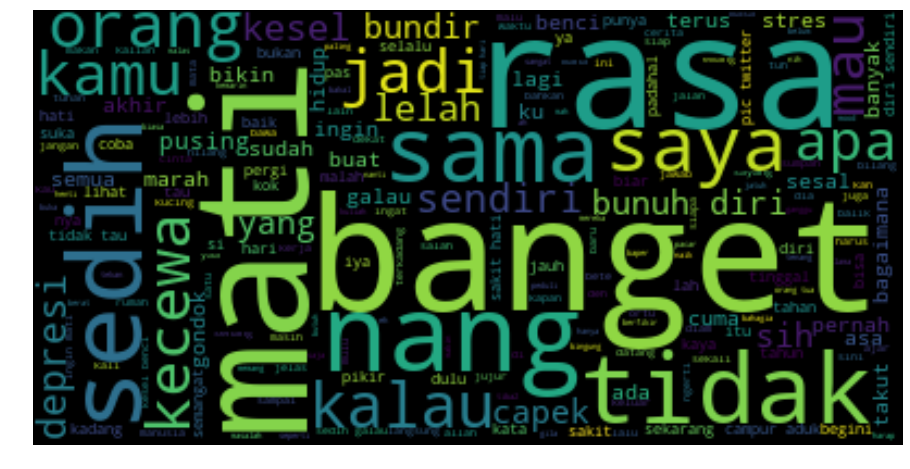

In [16]:
plot_word_cloud(data[data['is_depressed'] == True]['cleaned'])

## Word Cloud untuk Tweet yang Terdeteksi Healthy (Tidak Depresi)

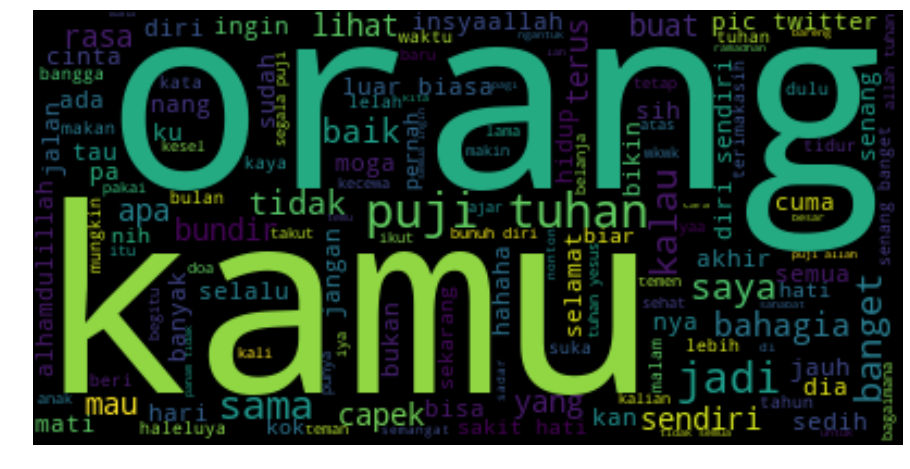

In [17]:
plot_word_cloud(data[data['is_depressed'] == False]['cleaned'])

## 3. Feature Extraction

In [78]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Vectorize
bow_transformer = CountVectorizer().fit(data["cleaned"])

tf_idf_transformer = TfidfVectorizer().fit(data["cleaned"])

def extract_tf_idf(tweet_list):
    return tf_idf_transformer.transform(np.array(tweet_list)).toarray()

def extract_bag_of_words(tweet_list):
    return bow_transformer.transform(np.array(tweet_list)).toarray()

In [79]:
bag_of_words_feature = extract_bag_of_words(cleaned)
tf_idf_feature = extract_tf_idf(cleaned)

## 4. Classification

In [80]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    KNeighborsClassifier(2),
    DecisionTreeClassifier(),
    LinearSVC(),
    LogisticRegression(solver='lbfgs'),
]

def classify(feature, label):
    result = []
    for classifier in classifiers:
        scores = cross_val_score(classifier, feature, label, cv=7)
#         print("="*30)
        print("Classifying with " + classifier.__class__.__name__ + "...")
#         print('****Results****')
#         print("Accuracy: %f (+/- %.2f)" % (scores.mean(), scores.std() * 2))
#         print(scores)
#         print("="*30 + "\n")
        result.append((classifier.__class__.__name__, scores))
    return result

def score_summary(results, sort_by='mean_score'):
    rows = []
    for key, scores in results:
        d = {
             'estimator': key,
             'min_score': min(scores),
             'max_score': max(scores),
             'mean_score': np.mean(scores),
             'std_score': np.std(scores),
        }
        rows.append(pd.Series(d))

    df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

    columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
    columns = columns + [c for c in df.columns if c not in columns]

    return df[columns]


In [81]:
score_summary(classify(tf_idf_feature, data['is_depressed']))

Classifying with KNeighborsClassifier...
Classifying with DecisionTreeClassifier...
Classifying with LinearSVC...
Classifying with LogisticRegression...


,estimator,min_score,mean_score,max_score,std_score
2,LinearSVC,0.676471,0.75071,0.823529,0.0612067
3,LogisticRegression,0.669118,0.739171,0.808824,0.0439991
1,DecisionTreeClassifier,0.620438,0.726757,0.801471,0.0617556
0,KNeighborsClassifier,0.617647,0.689992,0.786765,0.0653822


In [82]:
score_summary(classify(bag_of_words_feature, data['is_depressed']))

Classifying with KNeighborsClassifier...
Classifying with DecisionTreeClassifier...
Classifying with LinearSVC...
Classifying with LogisticRegression...


,estimator,min_score,mean_score,max_score,std_score
3,LogisticRegression,0.632353,0.749614,0.867647,0.0851701
2,LinearSVC,0.647059,0.716229,0.875,0.0781027
1,DecisionTreeClassifier,0.588235,0.684824,0.779412,0.0699887
0,KNeighborsClassifier,0.547445,0.63773,0.882353,0.106532


In [84]:
score_summary(classify(np.concatenate((bag_of_words_feature, tf_idf_feature), axis=1), data['is_depressed']))

Classifying with KNeighborsClassifier...
Classifying with DecisionTreeClassifier...
Classifying with LinearSVC...
Classifying with LogisticRegression...


,estimator,min_score,mean_score,max_score,std_score
3,LogisticRegression,0.639706,0.749637,0.860294,0.0843923
2,LinearSVC,0.654412,0.724587,0.860294,0.0719715
1,DecisionTreeClassifier,0.554745,0.710004,0.808824,0.0876743
0,KNeighborsClassifier,0.540146,0.64401,0.823529,0.0903425
